Hola


In [ ]:
2+2

4

In [ ]:
4*5+8-6

22

In [ ]:
x=5*2
print(x)

10


In [ ]:
x

10

In [ ]:
!python --version

Python 3.10.12


tarea: traer un juego hecho en python

> traer calculadora sencilla





 # calculadora

In [ ]:
def sumar(a, b):
    return a + b

def restar(a, b):
    return a - b

def multiplicar(a, b):
    return a * b

def dividir(a, b):
    if b == 0:
        return "Error: No se puede dividir entre cero"
    return a / b


def validar_numero(entrada):
    try:
        return float(entrada)
    except ValueError:
        return None


def mostrar_menu():
    print("\nMenú de Calculadora")
    print("1. Sumar")
    print("2. Restar")
    print("3. Multiplicar")
    print("4. Dividir")
    print("5. Salir")

def main():
    while True:
        mostrar_menu()
        opcion = input("Seleccione una opción (1-5): ")

        if opcion == '5':
            print("Saliendo del programa... gracias por usarlo")
            break

        if opcion not in ['1', '2', '3', '4']:
            print("Opción inválida. Por favor, seleccione una opción válida.")
            continue

        num1 = validar_numero(input("Ingrese el primer número: "))
        if num1 is None:
            print("Entrada inválida. Por favor, ingrese un número válido.")
            continue

        num2 = validar_numero(input("Ingrese el segundo número: "))
        if num2 is None:
            print("Entrada inválida. Por favor, ingrese un número válido.")
            continue


        if opcion == '1':
            resultado = sumar(num1, num2)
            print(f"El resultado de {num1} + {num2} es: {resultado}")
        elif opcion == '2':
            resultado = restar(num1, num2)
            print(f"El resultado de {num1} - {num2} es: {resultado}")
        elif opcion == '3':
            resultado = multiplicar(num1, num2)
            print(f"El resultado de {num1} * {num2} es: {resultado}")
        elif opcion == '4':
            resultado = dividir(num1, num2)
            print(f"El resultado de {num1} / {num2} es: {resultado}")


if __name__ == "__main__":
    main()


Menú de Calculadora
1. Sumar
2. Restar
3. Multiplicar
4. Dividir
5. Salir
Seleccione una opción (1-5): 1
Ingrese el primer número: 5
Ingrese el segundo número: 2
El resultado de 5.0 + 2.0 es: 7.0

Menú de Calculadora
1. Sumar
2. Restar
3. Multiplicar
4. Dividir
5. Salir
Seleccione una opción (1-5): 4
Ingrese el primer número: 5
Ingrese el segundo número: 0
El resultado de 5.0 / 0.0 es: Error: No se puede dividir entre cero

Menú de Calculadora
1. Sumar
2. Restar
3. Multiplicar
4. Dividir
5. Salir
Seleccione una opción (1-5): 5
Saliendo del programa... gracias por usarlo


# Juego de dices

In [ ]:
#import libreries
import numpy as np
import random
import time
from IPython.display import clear_output

In [ ]:
def clean_terminal():
    """Función para limpiar la pantalla."""
    clear_output(wait=True)

In [ ]:
def trow_dices():
    """Función para lanzar dos dados."""
    return np.random.randint(1, 7, 2)


In [ ]:
# function to show emojis
def show_emojis(resultado):
    emoji = {
        'ganar': """
        ^_^ ¡Ganaste! ¡Felicidades!
        """,
        'perder': """
        T_T ¡Perdiste esta ronda!
        """,
        'fin': """
        X_X ¡Te quedaste sin balance! Fin del juego.
        """,
        'retiro': """
        ^o^ Te retiraste a tiempo con tus ganancias. ¡Bien jugado!
        """
    }
    print(emoji[resultado])

In [ ]:
# simulator dices
def dice_simulator():
    print("¡Bienvenido al Simulador de apuestas con dices!")
    print("Reglas del juego:")
    print("1. Puedes apostar una cantidad de puntos.")
    print("2. Si la suma de los dados es 7 o 11, ganas el doble de lo apostado.")
    print("3. Si la suma es 2, 3 o 12, pierdes lo apostado.")
    print("4. Si cae cualquier otro número, no ganas ni pierdes y puedes seguir apostando.")
    print("5. El juego termina si te quedas sin balance o decides retirarte.\n")

    # Initial setup
    balance = 100  # opening balance
    opening_balance = balance  # start with opening balance
    print(f"Empiezas con un saldo de {balance} puntos.\n")

    while balance > 0:

        # Ask for the bet amount
        print(f"\nTu saldo actual es de {balance} puntos.")
        try:
            # Ask if you wants to continue betting or to withdraw
            decision = input("¿Quieres seguir jugando o retirarte? (jugar/retirar): ").lower()

            if decision == 'retirar':
                #show emoji to withdraw
                print(f"\nTe has retirado con un balance final de {balance} puntos.")
                show_emojis('retiro')
                print(f"Comenzaste con {opening_balance} puntos, y terminaste con {balance} puntos.")
                print(f"Tu ganancia total es de {balance - opening_balance} puntos.")
                break

            if decision != 'jugar':
                print("Opción no válida. Por favor, ingresa 'jugar' para seguir o 'retirar' para salir.")
                continue

            # Ask for the bet amount
            bet = int(input("¿Cuánto quieres apostar? (ingresa 0 para salir): "))
        except ValueError:
            print("Por favor, ingresa un número válido.")
            continue

        # Exit the game if 0 is entered
        if bet == 0:
            print(f"Has salido del juego con un saldo de {balance} puntos.")
            break

        # Validate that the bet is positive and less than or equal to the balance
        if bet < 0:
            print("No puedes apostar una cantidad negativa. Intenta de nuevo.")
            continue
        elif bet > balance:
            print("No tienes suficientes puntos para hacer esa apuesta.")
            continue

        # trow the dices
        dices = trow_dices()
        sum_dices = np.sum(dices)
        clean_terminal()
        print(f"\nLanzaste los dados: [{dices[0]}] y [{dices[1]}]")
        print(f"La suma de los dados es: {sum_dices}")

        #  bet results
        if sum_dices in [7, 11]:
            winnings = bet * 2
            balance += winnings
            print(f"¡Ganaste {winnings} puntos! Tu nuevo saldo es de {balance}.")
            show_emojis('ganar')
        elif sum_dices in [2, 3, 12]:
            balance -= bet
            print(f"¡Perdiste {bet} puntos! Tu nuevo saldo es de {balance}.")
            show_emojis('perder')
        else:
            print("No ganaste ni perdiste. La ronda fue neutral.")

    # Show end emoji if balance reaches zero
    if balance == 0:
        show_emojis('fin')
        print(f"Comenzaste con {opening_balance} puntos, y terminaste con {balance} puntos.")
        print(f"Tu pérdida total es de {opening_balance} puntos.")
    print("Gracias por jugar. ¡Hasta la próxima!")


In [ ]:
# Running the dice simulator
dice_simulator()


Lanzaste los dados: [6] y [6]
La suma de los dados es: 12
¡Perdiste 500 puntos! Tu nuevo saldo es de 0.

        T_T ¡Perdiste esta ronda!
        

        X_X ¡Te quedaste sin balance! Fin del juego.
        
Comenzaste con 100 puntos, y terminaste con 0 puntos.
Tu pérdida total es de 100 puntos.
Gracias por jugar. ¡Hasta la próxima!


# media moda y mediana


# Tarea 3

Tarea: hacer una función en python que, dependiendo de la hora del día, salude

In [ ]:
import datetime

def saludo_por_hora():
  """Función que devuelve un saludo dependiendo de la hora del día."""

  hora_actual = datetime.datetime.now().hour

  if 5 <= hora_actual < 12:
    return "¡Buenos días!"+str(hora_actual)
  elif 12 <= hora_actual < 19:
    return "¡Buenas tardes!"+str(hora_actual)
  else:
    return "¡Buenas noches!"+str(hora_actual)


print(saludo_por_hora() )


¡Buenos días!


In [ ]:
import datetime

def saludo_por_hora():
  """Función que devuelve un saludo (UTC-5)."""

  hora_actual = datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=-5))).hour

  if 5 <= hora_actual          < 12:
    return "¡Buenos días! su hora es "+str(hora_actual)
  elif 12 <= hora_actual < 19:
    return "¡Buenas tardes! su hora es "+str(hora_actual)
  else:
    return "¡Buenas noches! su hora es "+str(hora_actual)

print(saludo_por_hora())

¡Buenos días! su hora es11


# Pandas


In [ ]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




In [ ]:
#Create values
# It is a data set of fruits where have the name, weight of them and their colors
list_nameFruit = ['Lulo', 'Mango', 'Guava', 'Passion Fruit', 'Pineapple', 'Banana', 'Papaya', 'Avocado', 'Soursop', 'Coconut']
list_department = ['Huila', 'Cundinamarca ', 'Meta', 'Huila', 'Quindio', 'Caldas', 'Valle del Cauca', 'Tolima', 'Tolima', 'Choco']
list_weight = [0.2, 1.5, 0.3, 0.15, 2, 0.25, 1, 0.6, 1.2, 1.8] #in KG
list_color = ['green', 'yellow', 'red', 'yellow', 'brown', 'yellow', 'orange', 'green', 'light green', 'brown']
list_quantity = [120, 200, 150, 80, 90, 300, 100, 50, 30, 70]  # Quantity available
list_climate = ['Temperate', 'Hot', 'Temperate', 'Cold', 'Hot', 'Hot', 'Hot', 'Temperate', 'Hot', 'Hot'] # Using "Hot", "Temperate", or "Cold" to describe the climate type
list_price_per_kg = [5000, 3000, 2500, 6000, 2000, 1800, 1500, 7000, 8000, 3500]  # Price in COP per kg

In [ ]:
#Create dataframe for all fruit list description

dataFruit = {
    'Fruit': list_nameFruit,
    'Department': list_department,
    'Color': list_color,
    'Weight': list_weight,
    'Price': list_price_per_kg,
    'Quantity': list_quantity,
    'Climate': list_climate,
}

df= pd.DataFrame(dataFruit)

# Display the DataFrame
print("Dataframe Colombian Fruits Information:")
df

Dataframe Colombian Fruits Information:


Fruit       Department        Color  Weight  Price  Quantity  \
0           Lulo            Huila        green    0.20   5000       120   
1          Mango    Cundinamarca        yellow    1.50   3000       200   
2          Guava             Meta          red    0.30   2500       150   
3  Passion Fruit            Huila       yellow    0.15   6000        80   
4      Pineapple          Quindio        brown    2.00   2000        90   
5         Banana           Caldas       yellow    0.25   1800       300   
6         Papaya  Valle del Cauca       orange    1.00   1500       100   
7        Avocado           Tolima        green    0.60   7000        50   
8        Soursop           Tolima  light green    1.20   8000        30   
9        Coconut            Choco        brown    1.80   3500        70   

     Climate  
0  Temperate  
1        Hot  
2  Temperate  
3       Cold  
4        Hot  
5        Hot  
6        Hot  
7  Temperate  
8        Hot  
9        Hot

In [ ]:
# prompt: Con DataFrame df: crear una columna donde se ve el precio total dependiendo de la cantidad

# Create a new column 'TotalPrice' by multiplying 'Price' and 'Quantity'
df['TotalPrice'] = df['Price'] * df['Quantity']

# Display the updated DataFrame with the new column
df


Fruit       Department        Color  Weight  Price  Quantity  \
0           Lulo            Huila        green    0.20   5000       120   
1          Mango    Cundinamarca        yellow    1.50   3000       200   
2          Guava             Meta          red    0.30   2500       150   
3  Passion Fruit            Huila       yellow    0.15   6000        80   
4      Pineapple          Quindio        brown    2.00   2000        90   
5         Banana           Caldas       yellow    0.25   1800       300   
6         Papaya  Valle del Cauca       orange    1.00   1500       100   
7        Avocado           Tolima        green    0.60   7000        50   
8        Soursop           Tolima  light green    1.20   8000        30   
9        Coconut            Choco        brown    1.80   3500        70   

     Climate  TotalPrice  
0  Temperate      600000  
1        Hot      600000  
2  Temperate      375000  
3       Cold      480000  
4        Hot      180000  
5        Hot      540000  
6        Hot      150000  
7  Temperate      350000  
8        Hot      240000  
9        Hot      245000

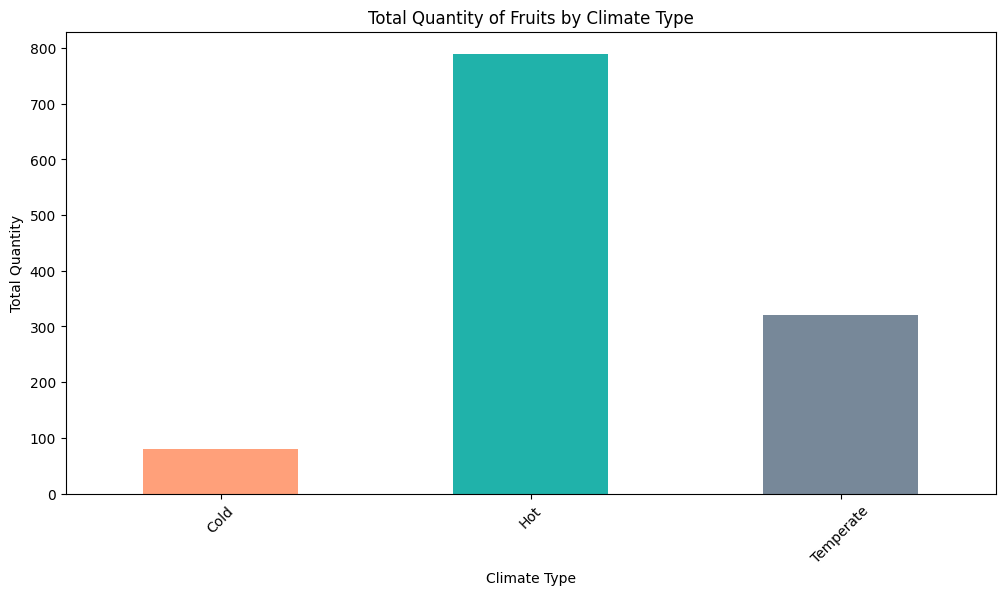

In [ ]:
#Created by Gemini and edited by Jonathan Vergara
plt.figure(figsize=(12, 6))
quantity_by_climate = df.groupby('Climate')['Quantity'].sum()
quantity_by_climate.plot(kind='bar', color=['#FFA07A', '#20B2AA', '#778899'])
plt.title('Total Quantity of Fruits by Climate Type')
plt.xlabel('Climate Type')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.show()

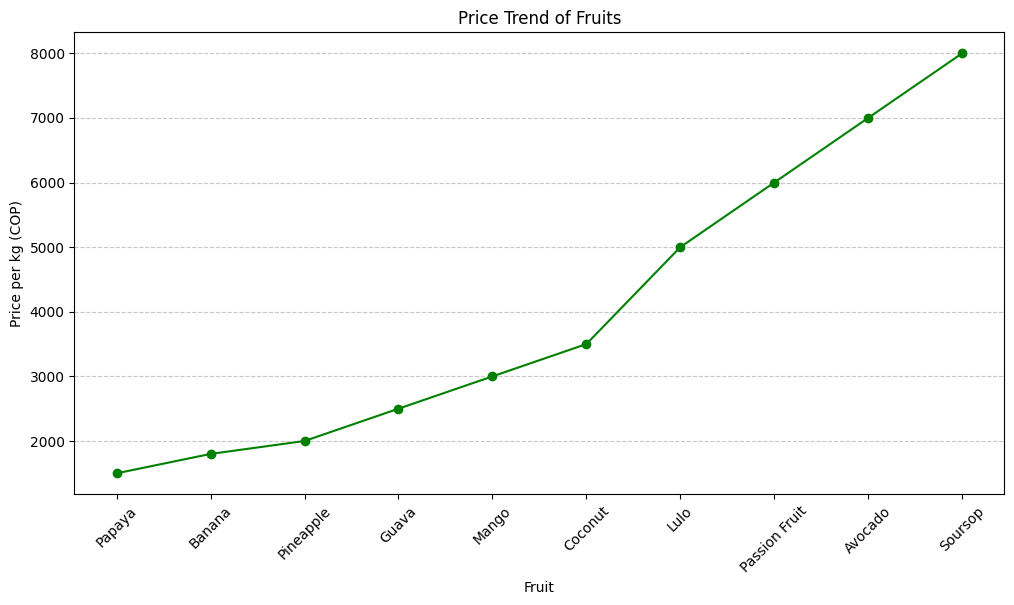

In [ ]:
# Line plot of fruits by price
plt.figure(figsize=(12, 6))
sorted_df = df.sort_values('PriceKg (COP)')
plt.plot(sorted_df['Fruit'], sorted_df['PriceKg (COP)'], marker='o', color='green')
plt.title('Price Trend of Fruits')
plt.xlabel('Fruit')
plt.ylabel('Price per kg (COP)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Estructura de datos Pandas

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = [1,2,3]
ser =pd.Series(data)
ser

0    1
1    2
2    3
dtype: int64

In [ ]:
data = [1,2,3]
ser =pd.Series(data =data, index=['a','b','c'],name='numeros',dtype='string')
ser


a    1
b    2
c    3
Name: numeros, dtype: string

# Tarea clase 6


- Desacargar archivo fraude.csv del google drive del bootcamp o un dataset de kaggle u otro repositorio
 - convertirlo en dataframe
- utilizar el metodo de clase describe, info, shape

In [ ]:
#IMPORT LIBRERIES
import numpy as np
import pandas as pd

In [ ]:
#convert file to dataframe

df = pd.read_csv("fraude.csv")
pd.set_option('display.max_rows', None) # NO LIMITAR FILAS
pd.set_option('display.max_columns', None) # NO LIMITAR COLUMNAS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
#class describe

data = df.describe()
data

step         amount          fraud
count  594643.000000  594643.000000  594643.000000
mean       94.986827      37.890135       0.012108
std        51.053632     111.402831       0.109369
min         0.000000       0.000000       0.000000
25%        52.000000      13.740000       0.000000
50%        97.000000      26.900000       0.000000
75%       139.000000      42.540000       0.000000
max       179.000000    8329.960000       1.000000

In [ ]:
#class info

data = df.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [ ]:
#class shape
data = df.shape
data

(594643, 10)

# tarea clase 6 -2

Tareas:
1. Eliminar columnas duplicadas
2. Clasificar mínimo en 3 categorias (3, 4, 5)

3. Aumentar mínimo 7 registros más (manual). Opcional: automáticamente crear 100 registros

In [ ]:
!pip install faker

#Import libraries
import pandas as pd
import numpy as np
from faker import Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.5 MB/s eta 0:00:00


In [ ]:
#Inicialize Faker

fake = Faker()

# Number of records for the DataFrame
num_records = 100

# Generate random data
healt_data = {
    'Name': [fake.first_name() for _ in range(num_records)],  #generate random first names using Faker libraries
    'Height_cm': np.random.randint(140, 200, size=num_records),  # Height range between 140 cm and 200 cm
    'Weight_kg': np.random.randint(40, 120, size=num_records),  # Weight range between 40 kg and 120 kg
}

In [ ]:
# Create the DataFrame
df = pd.DataFrame(healt_data)

In [ ]:
# Calculate BMI = Weight/ Height^2
df['Height_m'] = df['Height_cm'] / 100  # Convert height to meters
df['BMI'] = df['Weight_kg'] / (df['Height_m'] ** 2)  # Calculate Body Mass Index
df

Name  Height_cm  Weight_kg  Height_m        BMI
0       Kevin        178         60      1.78  18.937003
1        Ryan        178        108      1.78  34.086605
2   Stephanie        169         59      1.69  20.657540
3       Julie        152        111      1.52  48.043629
4       Sarah        158         97      1.58  38.855953
..        ...        ...        ...       ...        ...
95      Linda        199         45      1.99  11.363349
96       Todd        165         47      1.65  17.263545
97     Jerome        151         52      1.51  22.806017
98   Mitchell        166         96      1.66  34.838148
99    Richard        190        113      1.90  31.301939

[100 rows x 5 columns]

# Regresion Lineal


In [ ]:
# Add new colums like a category healt risk and activity level
def bmi_category(bmi):
    """Categorize BMI values"""
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal weight"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

def health_risk(category):
    """Assign a health risk level"""
    if category == "Underweight":
        return "Medium"
    elif category == "Normal weight":
        return "Low"
    elif category == "Overweight":
        return "Medium"
    else:
        return "High"

def activity_level(weight, bmi):
    """Assign activity levels"""
    if bmi < 18.5 or weight < 50:
        return "Sedentary"
    elif 50 <= weight < 80:
        return "Active"
    else:
        return "Highly Active"

# Apply functions to create new columns
df['Category'] = df['BMI'].apply(bmi_category)
df['Health_Risk'] = df['Category'].apply(health_risk)
df['Activity_Level'] = df.apply(lambda x: activity_level(x['Weight_kg'], x['BMI']), axis=1)

df

Name  Height_cm  Weight_kg  Height_m        BMI       Category  \
0       Kevin        178         60      1.78  18.937003  Normal weight   
1        Ryan        178        108      1.78  34.086605          Obese   
2   Stephanie        169         59      1.69  20.657540  Normal weight   
3       Julie        152        111      1.52  48.043629          Obese   
4       Sarah        158         97      1.58  38.855953          Obese   
..        ...        ...        ...       ...        ...            ...   
95      Linda        199         45      1.99  11.363349    Underweight   
96       Todd        165         47      1.65  17.263545    Underweight   
97     Jerome        151         52      1.51  22.806017  Normal weight   
98   Mitchell        166         96      1.66  34.838148          Obese   
99    Richard        190        113      1.90  31.301939          Obese   

   Health_Risk Activity_Level  
0          Low         Active  
1         High  Highly Active  
2          Low         Active  
3         High  Highly Active  
4         High  Highly Active  
..         ...            ...  
95      Medium      Sedentary  
96      Medium      Sedentary  
97         Low         Active  
98        High  Highly Active  
99        High  Highly Active  

[100 rows x 8 columns]

# Regresion Lineal simple

Dado los datos
x{1,2,2,3,4,4,5,6}
y{2,3,4,4,4,6,5,7}
al recta de ajustes minimos es y=0.8491x + 1.5094 ¿cual es el valor de Sr para la  recta?

In [ ]:
# Import Libraries
import numpy as np

In [ ]:
# get data
x = np.array([1, 2, 2, 3, 4, 4, 5, 6])
y = np.array([2, 3, 4, 4, 4, 6, 5, 7])

In [ ]:
# get line of best fit equation
# y = 0.8491x + 1.5094
y_pred = 0.8491 * x + 1.5094
print(y_pred)


[2.3585 3.2076 3.2076 4.0567 4.9058 4.9058 5.7549 6.604 ]


In [ ]:
# Calculate residuals (y - y_pred)
residuals = y - y_pred
print(residuals)

[-0.3585 -0.2076  0.7924 -0.0567 -0.9058  1.0942 -0.7549  0.396 ]


In [ ]:
# Calculate Sr (sum of squared residuals)
Sr = np.sum(residuals**2)
print(Sr)

3.54716995


In [ ]:

# Output the result
print(f"Sum of squared residuals (Sr) = {Sr:.4f}")

Sum of squared residuals (Sr) = 3.5472


Complex results

In [ ]:
#Import  aditional Libraries
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Function to compute predicted values based on a linear equation
def predict_values(x, coef, intercept):
    return coef * x + intercept


In [ ]:
# Function to calculate Sum of Squared Residuals (Sr)
def calculate_sr(y, y_pred):
    residuals = y - y_pred
    Sr = np.sum(residuals**2)
    return Sr

In [ ]:
# Function to calculate Mean Absolute Error (MAE)
def calculate_mae(y, y_pred):
    residuals = y - y_pred
    MAE = np.mean(np.abs(residuals))
    return MAE

In [ ]:
# Create a DataFrame with coefficients and errors for analysis
def create_analysis_dataframe(x, y, coef, intercept):
    y_pred = predict_values(x, coef, intercept)
    residuals = y - y_pred
    residual_squared = residuals**2
    residual_absolute = np.abs(residuals)

    # Create additional columns: 'xy' and 'yx'
    analysis_df = pd.DataFrame({
        'x': x,
        'y_actual': y,
        'y_predicted': y_pred,
        'residual': residuals,
        'residual_squared': residual_squared,
        'residual_absolute': residual_absolute,
        'xy': x * y,  # Calculate 'xy' as product of 'x' and 'y_actual'
        'yx': y * x   # 'yx' is the same as 'xy' in this context
    })

    return analysis_df

In [ ]:
# Given line of best fit parameters
coef = 0.8491
intercept = 1.5094

In [ ]:
# Step 1: Create the analysis DataFrame
analysis_df = create_analysis_dataframe(x, y, coef, intercept)

In [ ]:
# Step 2: Calculate Sr and MAE using the DataFrame values
Sr = calculate_sr(analysis_df['y_actual'], analysis_df['y_predicted'])
MAE = calculate_mae(analysis_df['y_actual'], analysis_df['y_predicted'])


In [ ]:
# Step 3: Print the DataFrame
print("Analysis DataFrame with `xy` and `yx` columns:")
analysis_df


Analysis DataFrame with `xy` and `yx` columns:


x  y_actual  y_predicted  residual  residual_squared  residual_absolute  \
0  1         2       2.3585   -0.3585          0.128522             0.3585   
1  2         3       3.2076   -0.2076          0.043098             0.2076   
2  2         4       3.2076    0.7924          0.627898             0.7924   
3  3         4       4.0567   -0.0567          0.003215             0.0567   
4  4         4       4.9058   -0.9058          0.820474             0.9058   
5  4         6       4.9058    1.0942          1.197274             1.0942   
6  5         5       5.7549   -0.7549          0.569874             0.7549   
7  6         7       6.6040    0.3960          0.156816             0.3960   

   xy  yx  
0   2   2  
1   6   6  
2   8   8  
3  12  12  
4  16  16  
5  24  24  
6  25  25  
7  42  42

In [ ]:
# Step 4: Plotting
# Set up a matplotlib figure
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

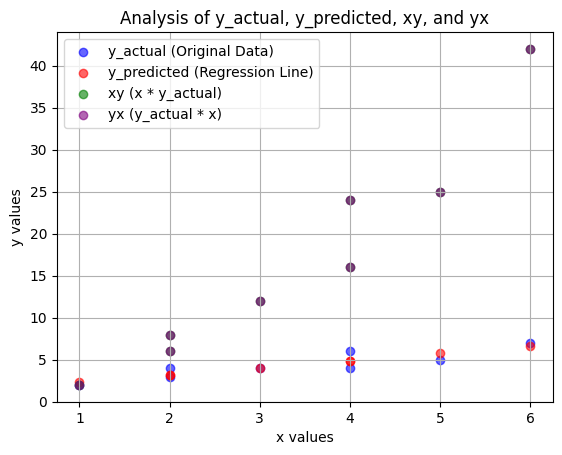

In [ ]:
# Plot original `x` vs. `y_actual` as blue scatter plot
plt.scatter(analysis_df['x'], analysis_df['y_actual'], color='blue', label='y_actual (Original Data)', alpha=0.6)
# Plot predicted `x` vs. `y_predicted` as red scatter plot
plt.scatter(analysis_df['x'], analysis_df['y_predicted'], color='red', label='y_predicted (Regression Line)', alpha=0.6)
# Plot `x` vs. `xy` as green scatter plot
plt.scatter(analysis_df['x'], analysis_df['xy'], color='green', label='xy (x * y_actual)', alpha=0.6)
# Plot `x` vs. `yx` as purple scatter plot (same as `xy`)
plt.scatter(analysis_df['x'], analysis_df['yx'], color='purple', label='yx (y_actual * x)', alpha=0.6)
# Adding plot details
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Analysis of y_actual, y_predicted, xy, and yx')

# Show the legend with all elements after all plots are added
plt.legend()

# Show grid and display the plot
plt.grid(True)

plt.show()

In [ ]:
# Display calculated metrics
print(f"\nSum of squared residuals (Sr): {Sr:.4f}")
print(f"Mean Absolute Error (MAE): {MAE:.4f}")


Sum of squared residuals (Sr): 3.5472
Mean Absolute Error (MAE): 0.5708


# Regresion lineal Multiple


crea dataframe con columnas x1,x2, Y
crea 20 filas
grafica x1 vs y, x2 vs Y
realiza regresion Lineal Multimple
hallar coeficientes e interceptores

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
#Step 1: Create a DataFrame with random values for columns x1, x2, and Y
np.random.seed(42)  # For reproducibility
X1 = np.random.rand(20) * 100  # 20 random values for x1 scaled up to 100
X2 = np.random.rand(20) * 100  # 20 random values for x2 scaled up to 100
Y = 3.5 * x1 + 2.7 * x2 + np.random.randn(20) * 20  # Generating Y based on x1 and x2 with some noise


In [ ]:
# Create a DataFrame
data = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})
data

X1         X2           Y
0   37.454012  61.185289  296.019379
1   95.071431  13.949386  349.259131
2   73.199394  29.214465  351.527833
3   59.865848  36.636184  284.031294
4   15.601864  45.606998  181.922692
5   15.599452  78.517596  227.402189
6    5.808361  19.967378   47.677464
7   86.617615  51.423444  445.942174
8   60.111501  59.241457  385.111519
9   70.807258   4.645041  263.794379
10   2.058449  60.754485  168.928717
11  96.990985  17.052412  379.487888
12  83.244264   6.505159  279.348415
13  21.233911  94.888554  316.120900
14  18.182497  96.563203  315.146612
15  18.340451  80.839735  303.601307
16  30.424224  30.461377  195.602869
17  52.475643   9.767211  174.775419
18  43.194502  68.423303  342.405353
19  29.122914  44.015249  213.069727

In [ ]:
#Prepare the data for Multiple Linear Regression
X = data[['X1', 'X2']]  # Use both X1 and X2 as independent variables
y = data['Y']  # Target variable


In [ ]:
# Create a LinearRegression object
model = LinearRegression()

In [ ]:
#Fit the model to the data
model.fit(X, y)

LinearRegression()

Text(0, 0.5, 'Y')

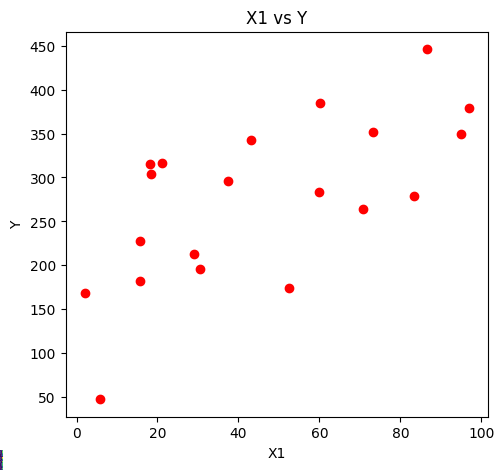

In [ ]:
# Step 2: Plot x1 vs Y and x2 vs Y
plt.figure(figsize=(12, 5))
plt.figimage(data)
plt.subplot(1, 2, 1)
plt.scatter(data['X1'], data['Y'], color='red')
plt.title('X1 vs Y')
plt.xlabel('X1')
plt.ylabel('Y')


Text(0, 0.5, 'Y')

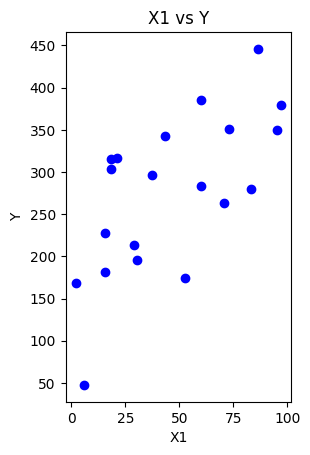

In [ ]:
# Plot x1 vs Y
plt.subplot(1, 2, 1)
plt.scatter(data['X1'], data['Y'], color='blue')
plt.title('X1 vs Y')
plt.xlabel('X1')
plt.ylabel('Y')


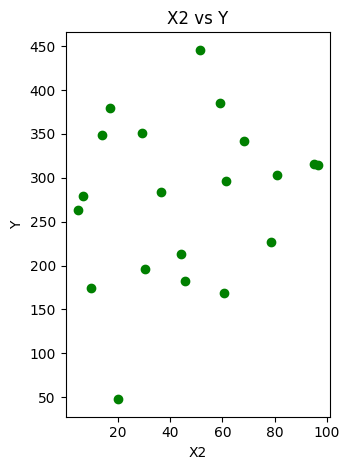

In [ ]:
# Plot x2 vs Y
plt.subplot(1, 2, 2)
plt.scatter(data['X2'], data['Y'], color='green')
plt.title('X2 vs Y')
plt.xlabel('X2')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

In [ ]:
# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_


In [ ]:
# Print the coefficients and intercept
print("\nRegression Coefficients:")
print(f"Coefficient for X1: {coefficients[0]:.4f}")
print(f"Coefficient for X2: {coefficients[1]:.4f}")
print(f"Intercept: {intercept:.4f}")


Regression Coefficients:
Coefficient for X1: 3.6302
Coefficient for X2: 2.9209
Intercept: -22.9487


In [ ]:
#Print the resulting regression equation
print("\nThe resulting regression equation is:")
print(f"Y = {coefficients[0]:.4f} * X1 + {coefficients[1]:.4f} * X2 + {intercept:.4f}")



The resulting regression equation is:
Y = 3.6302 * X1 + 2.9209 * X2 + -22.9487


In [ ]:
#Create predictions for Y
data['Y_pred'] = model.predict(X)

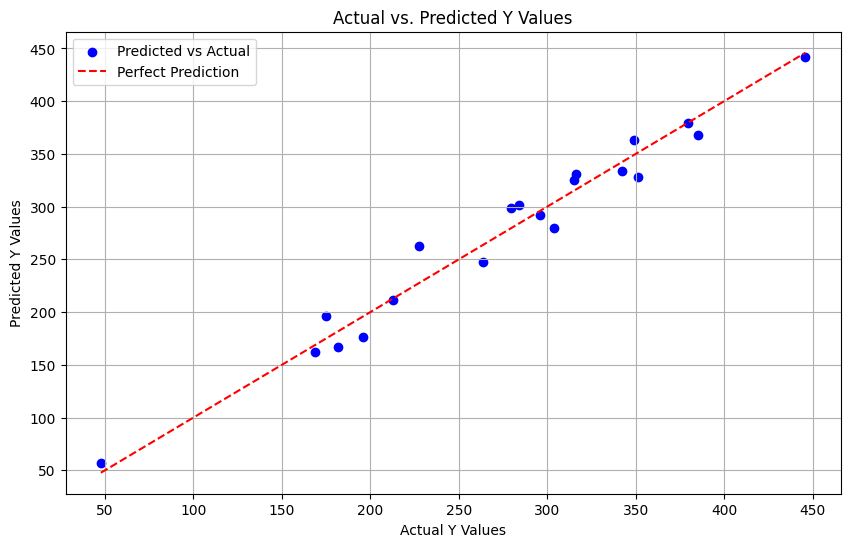

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(data['Y'], data['Y_pred'], color='blue', label='Predicted vs Actual')
plt.plot([data['Y'].min(), data['Y'].max()], [data['Y'].min(), data['Y'].max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Y Values')
plt.ylabel('Predicted Y Values')
plt.title('Actual vs. Predicted Y Values')
plt.legend()
plt.grid()
plt.show()

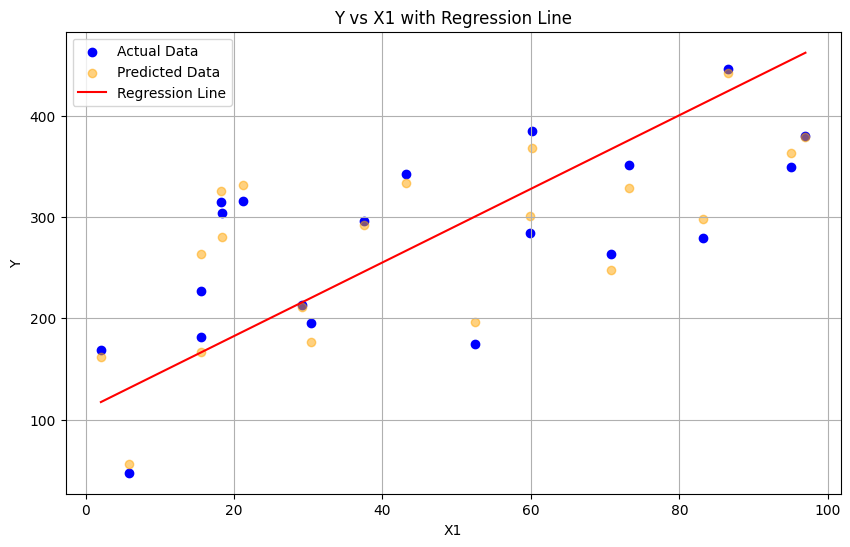

In [ ]:
# Plot Y against X1 with regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['X1'], data['Y'], color='blue', label='Actual Data')
plt.scatter(data['X1'], data['Y_pred'], color='orange', label='Predicted Data', alpha=0.5)
# Calculate regression line for X1
X1_range = np.linspace(data['X1'].min(), data['X1'].max(), 100)
Y_line = intercept + coefficients[0] * X1_range + coefficients[1] * (np.mean(data['X2']))  # Using mean of X2
plt.plot(X1_range, Y_line, color='red', label='Regression Line')
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Y vs X1 with Regression Line')
plt.legend()
plt.grid()
plt.show()

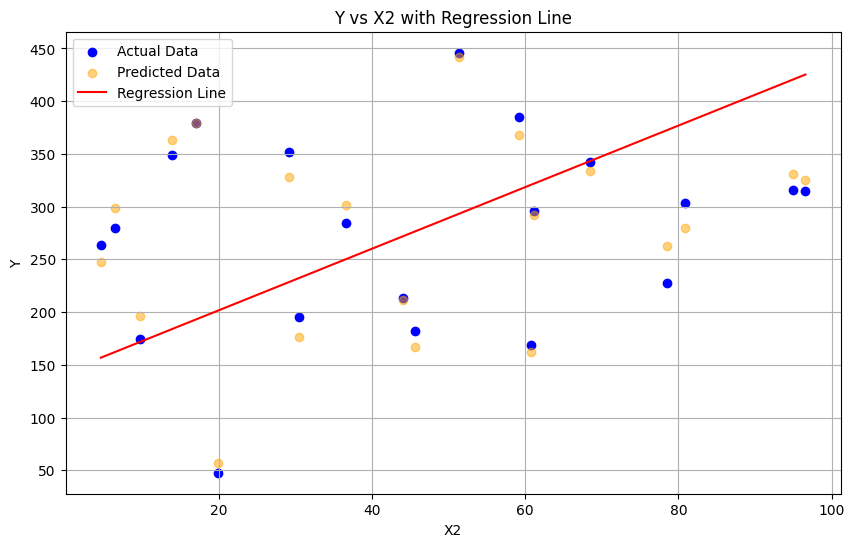

In [ ]:
# Plot Y against X2 with regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['X2'], data['Y'], color='blue', label='Actual Data')
plt.scatter(data['X2'], data['Y_pred'], color='orange', label='Predicted Data', alpha=0.5)
# Calculate regression line for X2
X2_range = np.linspace(data['X2'].min(), data['X2'].max(), 100)
Y_line_X2 = intercept + coefficients[1] * X2_range + coefficients[0] * (np.mean(data['X1']))  # Using mean of X1
plt.plot(X2_range, Y_line_X2, color='red', label='Regression Line')
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Y vs X2 with Regression Line')
plt.legend()
plt.grid()
plt.show()

Tarea:
funcion donde calcular error cuadratico absoluto y real ye pred MAE


In [ ]:
import numpy as np

def calculate_mae(y_true, y_pred):
  """
  Calculates the Mean Absolute Error (MAE) between true and predicted values.

  Args:
    y_true: A NumPy array or list of true target values.
    y_pred: A NumPy array or list of predicted target values.

  Returns:
    The MAE value.
  """
  return np.mean(np.abs(np.array(y_true) - np.array(y_pred)))


def calculate_mse(y_true, y_pred):
  """
  Calculates the Mean Squared Error (MSE) between true and predicted values.

  Args:
    y_true: A NumPy array or list of true target values.
    y_pred: A NumPy array or list of predicted target values.

  Returns:
    The MSE value.
  """
  return np.mean((np.array(y_true) - np.array(y_pred))**2)


# Example Usage
y_true = [1, 2, 3, 4, 5] # Removed extra space at the beginning of the line
y_pred = [1.2, 2.1, 3.5, 4.8, 5.3]
mae = calculate_mae(y_true, y_pred)
mse = calculate_mse(y_true, y_pred)
print("MAE:", mae)
print("MSE:", mse)

MAE: 0.37999999999999995
MSE: 0.2059999999999999


# Series temporales

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# Generate Time Series Data
np.random.seed(42)  # For reproducibility

# Create a date range
date_range = pd.date_range(start='2020-01-01', periods=100, freq='D')  # 100 days of daily data
# Generate random values
data_values = np.random.randn(100).cumsum() + 20  # Cumulative sum to create a trend


In [ ]:
# Create a DataFrame
time_series_data = pd.DataFrame({'Date': date_range, 'Values': data_values})
time_series_data.set_index('Date', inplace=True)

# Display the first few rows of the dataset
print("Generated Time Series Data:")
time_series_data.head()

Generated Time Series Data:


Values
Date                 
2020-01-01  20.496714
2020-01-02  20.358450
2020-01-03  21.006138
2020-01-04  22.529168
2020-01-05  22.295015

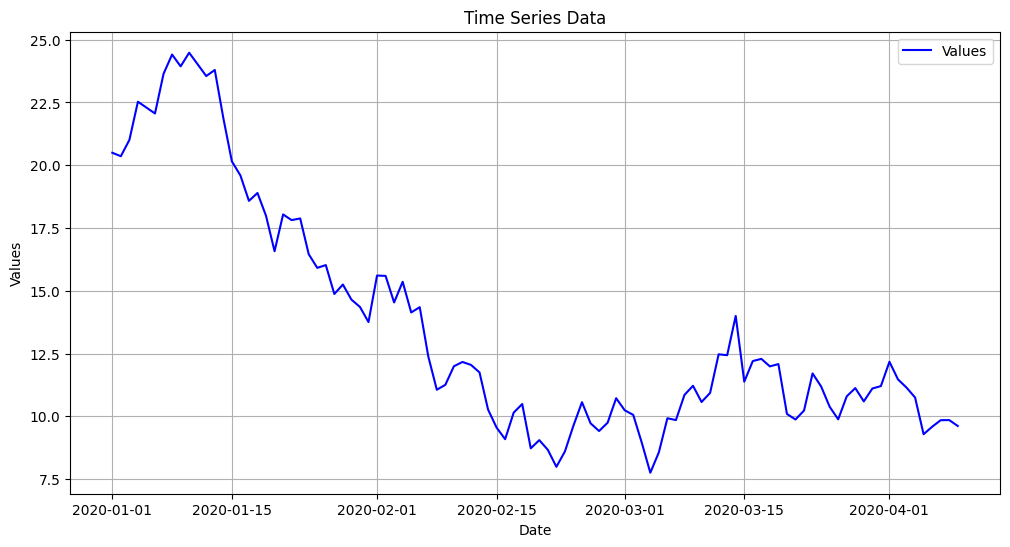

In [ ]:
#Visualize the Time Series
plt.figure(figsize=(12, 6))
plt.plot(time_series_data.index, time_series_data['Values'], color='blue', label='Values')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Decompose the Time Series
decomposition = sm.tsa.seasonal_decompose(time_series_data['Values'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

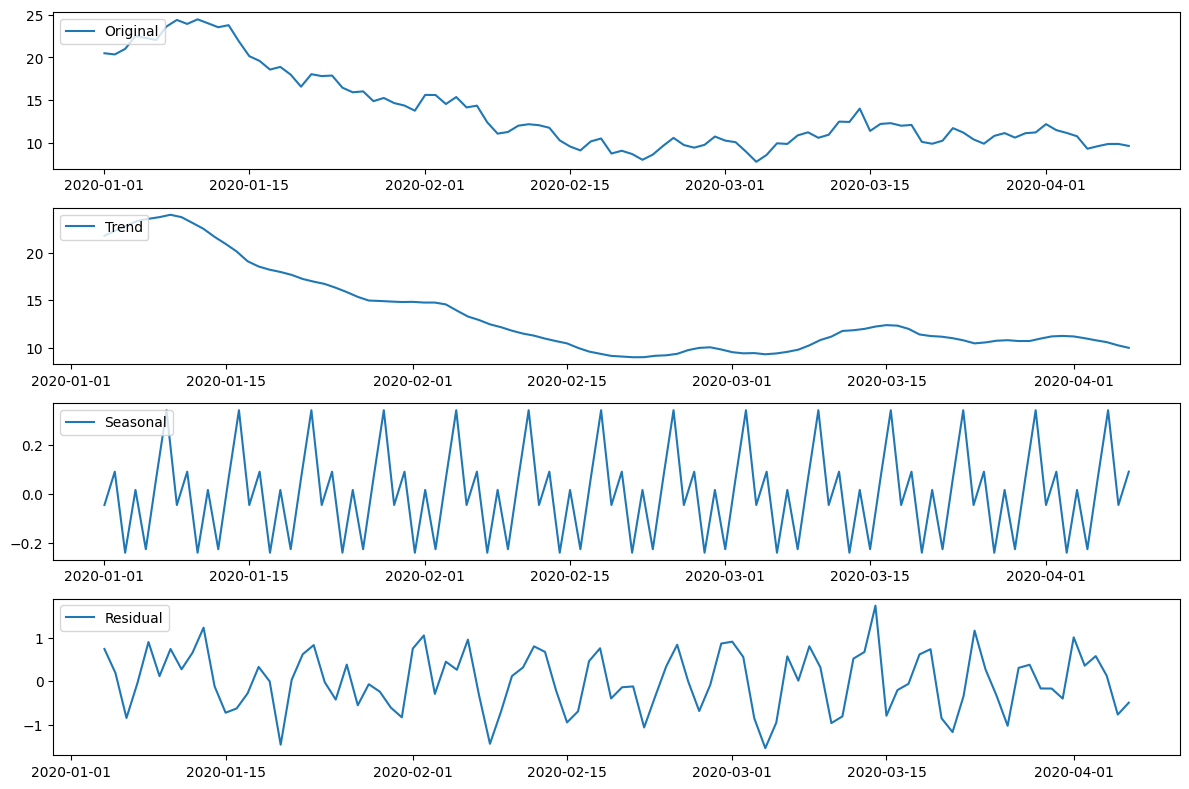

In [ ]:
# Plot decomposition
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(time_series_data['Values'], label='Original')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

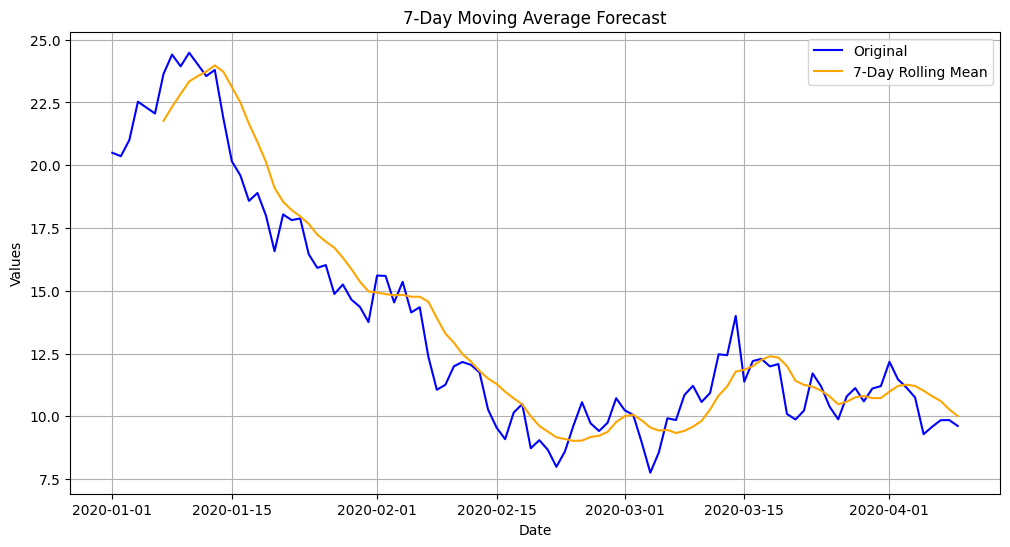

In [ ]:
# Forecasting (Example with Moving Average)
#generate by gemini
rolling_mean = time_series_data['Values'].rolling(window=7).mean()  # 7-day moving average
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['Values'], color='blue', label='Original')
plt.plot(rolling_mean, color='orange', label='7-Day Rolling Mean')
plt.title('7-Day Moving Average Forecast')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

# Analisis exploratorio

Generated Time Series Data:
            Temperature   Humidity  HeadIndex
Date                                         
2020-01-01    24.967142  28.769439  41.804742
2020-01-02    18.617357  43.690320  37.868914
2020-01-03    26.476885  44.859282  41.834852
2020-01-04    35.230299  37.965841  46.543375
2020-01-05    17.658466  47.580714  37.159039


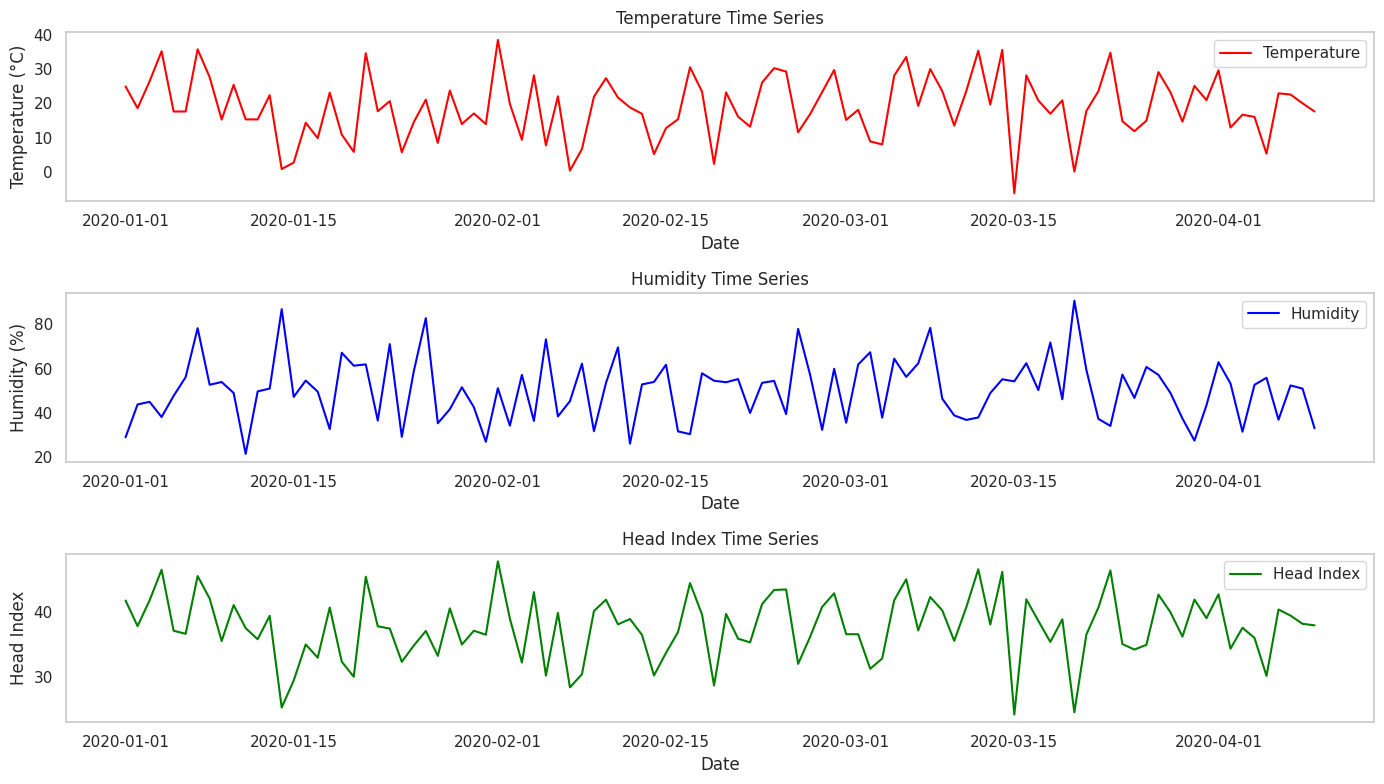


Statistical Summary:


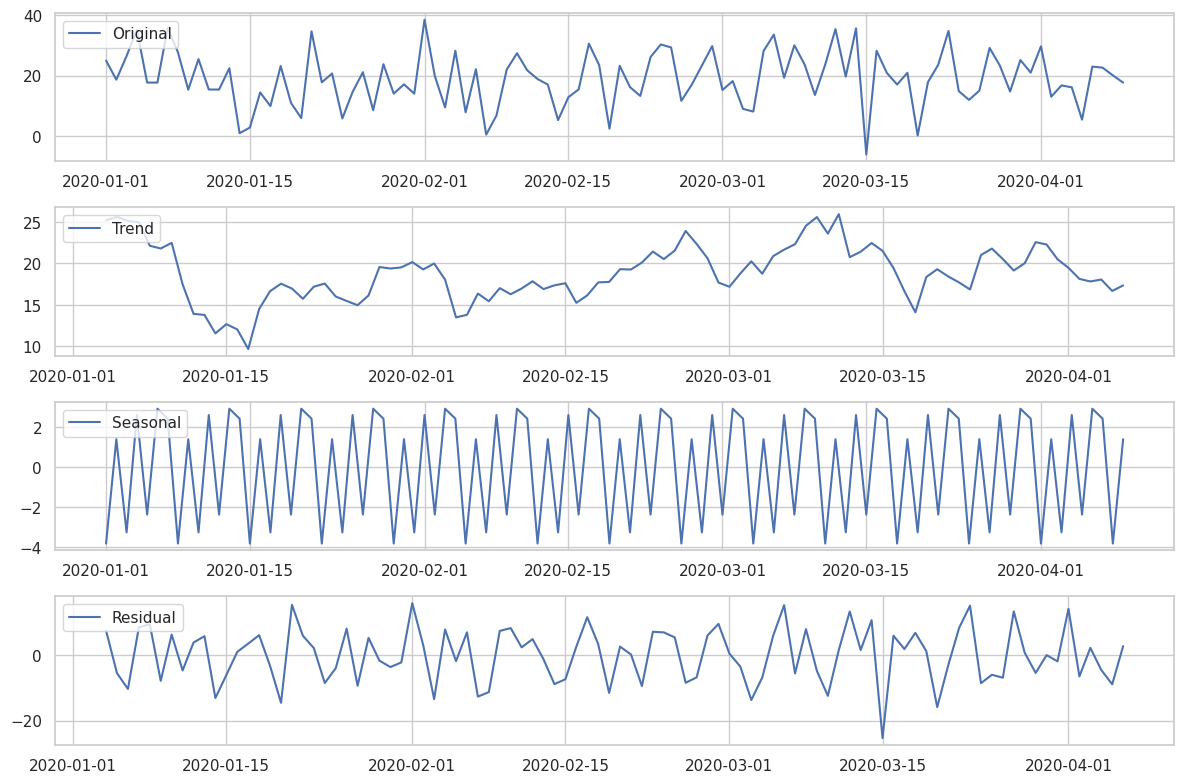

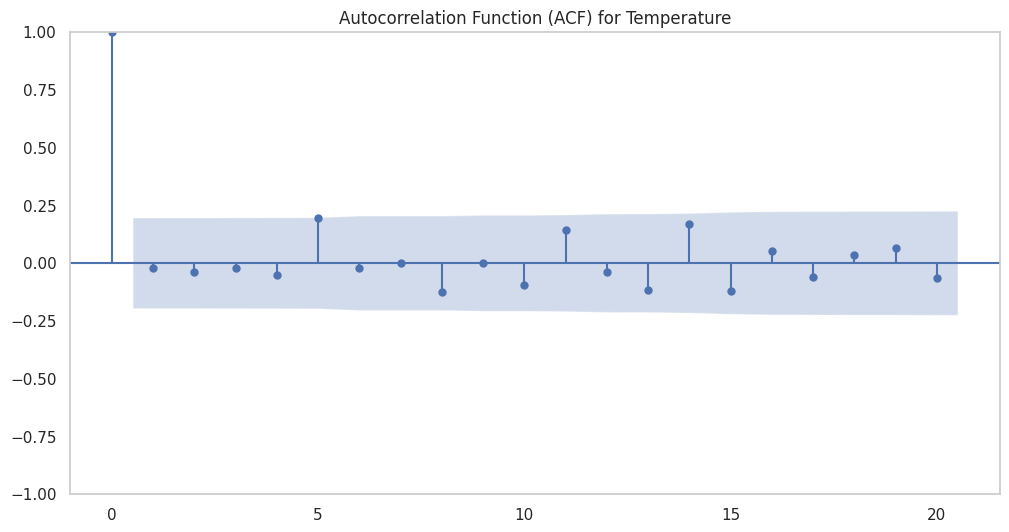


Missing Values in the Data:


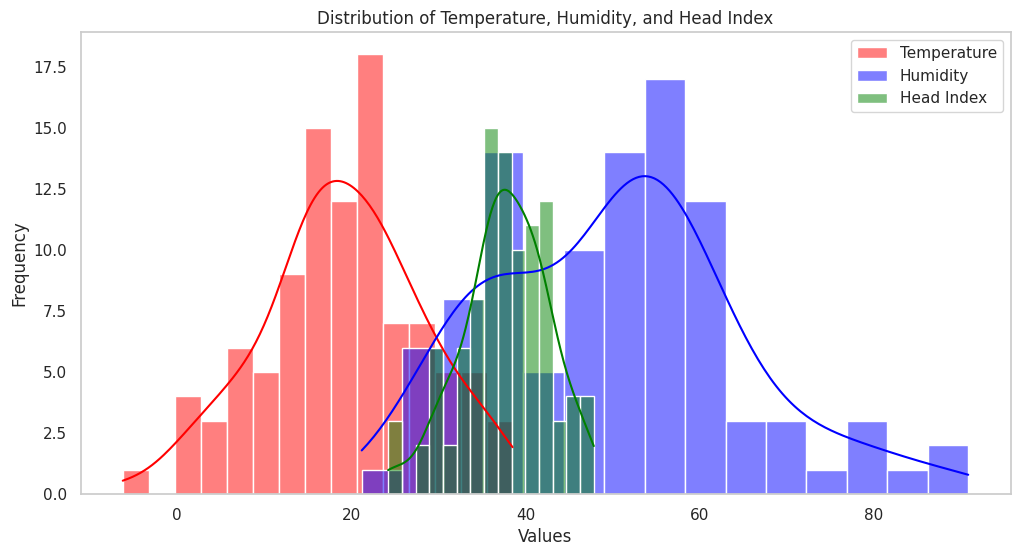

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set visualisation style
sns.set(style='whitegrid')

# Step 1: Generate Time Series Data
np.random.seed(42)  # For reproducibility

# Create a date range
date_range = pd.date_range(start='2020-01-01', periods=100, freq='D')  # 100 days of daily data
# Generate random values for temperature, humidity, and head index
temperature = 20 + 10 * np.random.randn(100)  # Mean 20, Std 10
humidity = 50 + 15 * np.random.randn(100)     # Mean 50, Std 15
head_index = temperature - (0.55 - 0.0014 * humidity) * (temperature - 58)

# Create a DataFrame
time_series_data = pd.DataFrame({
    'Date': date_range,
    'Temperature': temperature,
    'Humidity': humidity,
    'HeadIndex': head_index
})
time_series_data.set_index('Date', inplace=True)

# Display the first few rows of the dataset
print("Generated Time Series Data:")
print(time_series_data.head())

# Step 2: Visualize the Time Series
plt.figure(figsize=(14, 8))

# Plot Temperature
plt.subplot(3, 1, 1)
plt.plot(time_series_data.index, time_series_data['Temperature'], color='red', label='Temperature')
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()

# Plot Humidity
plt.subplot(3, 1, 2)
plt.plot(time_series_data.index, time_series_data['Humidity'], color='blue', label='Humidity')
plt.title('Humidity Time Series')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.legend()
plt.grid()

# Plot Head Index
plt.subplot(3, 1, 3)
plt.plot(time_series_data.index, time_series_data['HeadIndex'], color='green', label='Head Index')
plt.title('Head Index Time Series')
plt.xlabel('Date')
plt.ylabel('Head Index')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Step 3: Statistical Summary
print("\nStatistical Summary:")
time_series_data.describe()

# Step 4: Decompose the Time Series (Using Temperature as an example)
decomposition = sm.tsa.seasonal_decompose(time_series_data['Temperature'], model='additive', period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot decomposition
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(time_series_data['Temperature'], label='Original')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Step 5: Autocorrelation Analysis for Temperature
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(time_series_data['Temperature'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Temperature')
plt.grid()
plt.show()

# Step 6: Check for Missing Values
print("\nMissing Values in the Data:")
time_series_data.isnull().sum()

# Step 7: Distribution of Values
plt.figure(figsize=(12, 6))
sns.histplot(time_series_data['Temperature'], bins=15, kde=True, label='Temperature', color='red')
sns.histplot(time_series_data['Humidity'], bins=15, kde=True, label='Humidity', color='blue', alpha=0.5)
sns.histplot(time_series_data['HeadIndex'], bins=15, kde=True, label='Head Index', color='green', alpha=0.5)
plt.title('Distribution of Temperature, Humidity, and Head Index')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


# Regresion logistica

Crear Regresión Logística entre BMI y Outcome

Encontrar coeficientes e intercepto


In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load the data from the uploaded CSV file
file_path = '/content/diabetes.csv'
data = pd.read_csv(file_path)

In [ ]:
#Display the first few rows to understand the structure of the dataset
print("First 5 rows of the dataset:")
data.head()


First 5 rows of the dataset:


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# Selecst columns 'BMI' and 'Outcome' for logistic regression
# Outcome is dependent variable (binary: 0 or 1), and BMI is independent variable
X = data[['BMI']]  # Independent variable
y = data['Outcome']  # Dependent variable


In [ ]:
# Create a Logistic Regression model and fit it to the data
log_model = LogisticRegression()
log_model.fit(X, y)

LogisticRegression()

In [ ]:
#Get the coefficients and intercept of the trained model
coef = log_model.coef_[0][0]
intercept = log_model.intercept_[0]
print(f"Coefficient for BMI: {coef:.4f}")
print(f"Intercept: {intercept:.4f}")

Coefficient for BMI: 0.0935
Intercept: -3.6860


In [ ]:
# create function the logistic to calculate probability
def logistic_function(x):
    return 1 / (1 + np.exp(-(coef * x + intercept)))

In [ ]:
# Generate a range of BMI values for plotting
bmi_values = np.linspace(data['BMI'].min(), data['BMI'].max(), 300)  # 300 points between min and max BMI
bmi_values

array([ 0.        ,  0.22441472,  0.44882943,  0.67324415,  0.89765886,
        1.12207358,  1.34648829,  1.57090301,  1.79531773,  2.01973244,
        2.24414716,  2.46856187,  2.69297659,  2.9173913 ,  3.14180602,
        3.36622074,  3.59063545,  3.81505017,  4.03946488,  4.2638796 ,
        4.48829431,  4.71270903,  4.93712375,  5.16153846,  5.38595318,
        5.61036789,  5.83478261,  6.05919732,  6.28361204,  6.50802676,
        6.73244147,  6.95685619,  7.1812709 ,  7.40568562,  7.63010033,
        7.85451505,  8.07892977,  8.30334448,  8.5277592 ,  8.75217391,
        8.97658863,  9.20100334,  9.42541806,  9.64983278,  9.87424749,
       10.09866221, 10.32307692, 10.54749164, 10.77190635, 10.99632107,
       11.22073579, 11.4451505 , 11.66956522, 11.89397993, 12.11839465,
       12.34280936, 12.56722408, 12.7916388 , 13.01605351, 13.24046823,
       13.46488294, 13.68929766, 13.91371237, 14.13812709, 14.36254181,
       14.58695652, 14.81137124, 15.03578595, 15.26020067, 15.48

In [ ]:
# Calculate the probability using the logistic function
probabilities = logistic_function(bmi_values)
probabilities

array([0.02445958, 0.02496538, 0.02548136, 0.02600772, 0.02654466,
       0.02709238, 0.02765108, 0.02822096, 0.02880224, 0.02939514,
       0.02999986, 0.03061663, 0.03124567, 0.03188721, 0.03254148,
       0.03320871, 0.03388914, 0.03458302, 0.03529059, 0.03601209,
       0.03674778, 0.03749792, 0.03826276, 0.03904257, 0.03983761,
       0.04064816, 0.04147449, 0.04231687, 0.0431756 , 0.04405095,
       0.04494321, 0.04585267, 0.04677964, 0.04772442, 0.0486873 ,
       0.04966859, 0.0506686 , 0.05168766, 0.05272607, 0.05378416,
       0.05486226, 0.05596069, 0.05707978, 0.05821987, 0.0593813 ,
       0.06056441, 0.06176954, 0.06299704, 0.06424727, 0.06552057,
       0.06681731, 0.06813784, 0.06948253, 0.07085173, 0.07224582,
       0.07366517, 0.07511014, 0.07658111, 0.07807846, 0.07960257,
       0.0811538 , 0.08273255, 0.08433919, 0.0859741 , 0.08763768,
       0.0893303 , 0.09105235, 0.09280421, 0.09458627, 0.09639891,
       0.09824252, 0.10011749, 0.10202419, 0.103963  , 0.10593

In [ ]:
# Plot the original data and the logistic regression curve
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

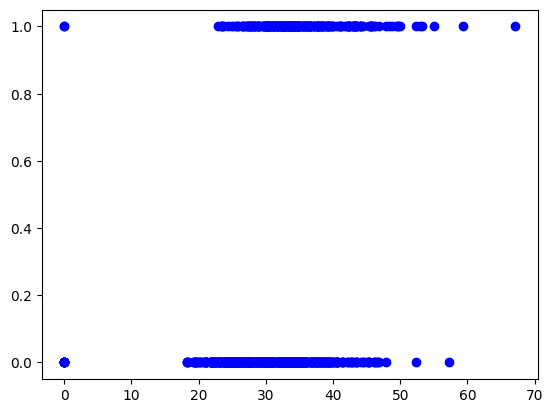

In [ ]:
# Scatter plot of the actual data
plt.scatter(data['BMI'], data['Outcome'], color='blue', label='Actual Data')


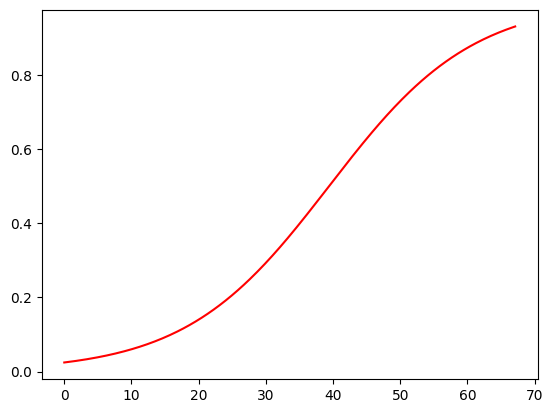

In [ ]:
# Plot the logistic regression curve
plt.plot(bmi_values, probabilities, color='red', label='Logistic Regression Curve')


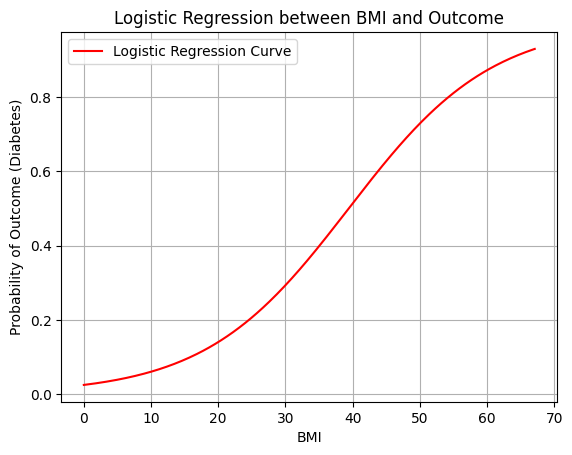

In [ ]:
# Add plot labels and title
plt.plot(bmi_values, probabilities, color='red', label='Logistic Regression Curve')
plt.xlabel('BMI')
plt.ylabel('Probability of Outcome (Diabetes)')
plt.title('Logistic Regression between BMI and Outcome')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


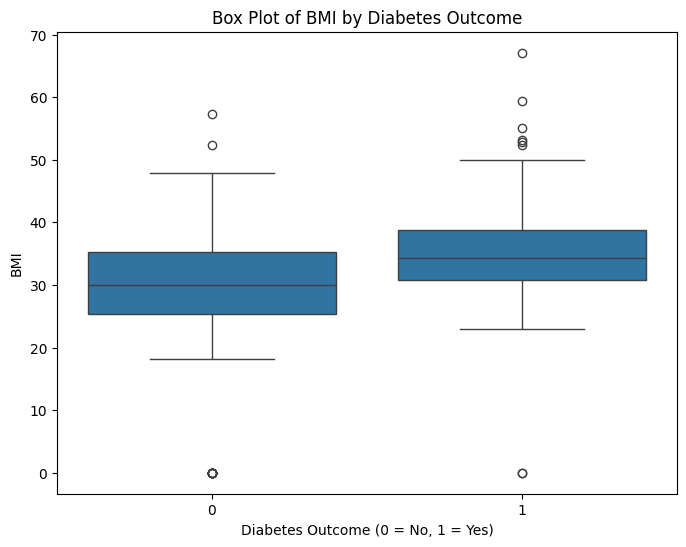

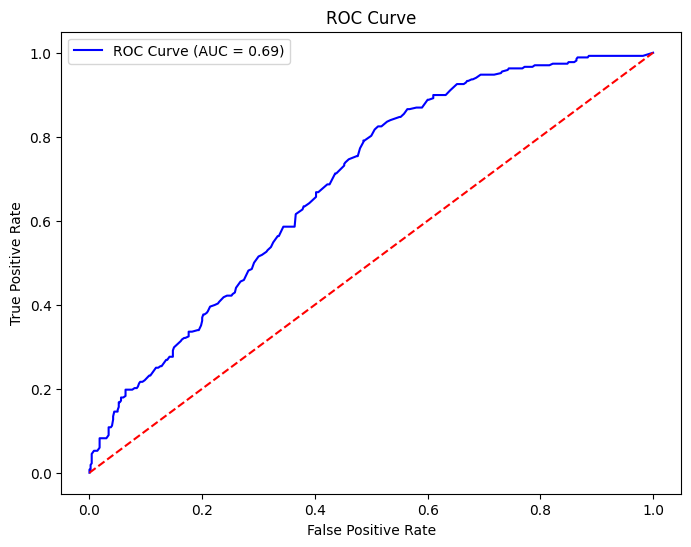

In [ ]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc
#created by gemini
# Box plot of BMI by Outcome
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='BMI', data=data)
plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.title('Box Plot of BMI by Diabetes Outcome')
plt.show()

# ROC Curve
y_probs = log_model.predict_proba(X)[:, 1]  # Get predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Metricas de evaluacion




#Matriz de confusion


In [ ]:
# Import libraries
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Convert confusion matrix to true and predicted labels
def create_labels(matrix):
    """
    Convert the confusion matrix into y_true and y_pred labels.
    """
    # Extract TN, FP, FN, TP from the matrix
    TN, FP, FN, TP = matrix[0, 0], matrix[0, 1], matrix[1, 0], matrix[1, 1]

    # Generate the true and predicted labels based on matrix values
    y_true = np.array([0]*TN + [0]*FP + [1]*FN + [1]*TP)
    y_pred = np.array([0]*TN + [1]*FP + [0]*FN + [1]*TP)

    return y_true, y_pred

In [ ]:
#Calculate precision, recall, F1-score, and support
def precision_recall_f1(matrix):
    """
    Calculate precision, recall, F1-score, and support for each class.
    """
    y_true, y_pred = create_labels(matrix)
    # Calculate the classification report
    report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'], digits=2, output_dict=True)
    report
    return report

In [ ]:
#Calculate overall metrics like accuracy, macro avg, and weighted avg
def overall_metrics(matrix):
  ##create by gemini
    """
    Calculate accuracy, macro average, and weighted average from the matrix.
    """
    report = precision_recall_f1(matrix)
    accuracy = report['accuracy']
    macro_avg = report['macro avg']
    weighted_avg = report['weighted avg']

    return accuracy, macro_avg, weighted_avg


In [ ]:
# Define the matrix as 'array'
array = np.array([[162, 4], [11, 22]])

# Sección nueva

In [ ]:
y_true, y_pred = create_labels(array)
conf_matrix = confusion_matrix(y_true, y_pred)

In [ ]:
print("Confusion Matrix:\n")
conf_matrix


Confusion Matrix:



array([[162,   4],
       [ 11,  22]])

In [ ]:
report = precision_recall_f1(array)

In [ ]:
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'], digits=2))


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.94      0.98      0.96       166
     Class 1       0.85      0.67      0.75        33

    accuracy                           0.92       199
   macro avg       0.89      0.82      0.85       199
weighted avg       0.92      0.92      0.92       199



curva de rose

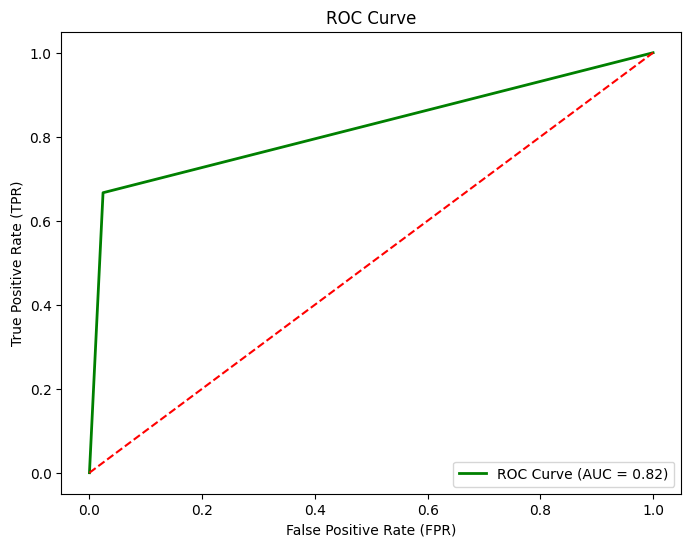

In [ ]:
#Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

#Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal reference line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

ACTIVIDAD EN CLASE: calcular manualmente lo que se ve en pantalla... si termina antes seguir con la curva ROC (y calculo de la AUC, para esto último solo usar Gemini para tal fin)
Andres Escallon
21:01
También matriz de 10x10: dígitos manuscritos (0...9)
Andres Escallon
21:02
Generalizar a matriz nxn: n clases

# Clasificacion multinomial

Tarea regresion logistica
metricas de clasificacion
matriz de confucion
 y_test = [0,0,0,0,0,1,1,1,1,1,2,2,2,2]
y_pred = [0,1,2,0,0,1,0,1,0,1,1,2,0,2]

In [ ]:
#Import libraries
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Given labels
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2]
y_pred = [0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2]



Confusion Matrix:
 [[3 1 1]
 [2 3 0]
 [1 1 2]]


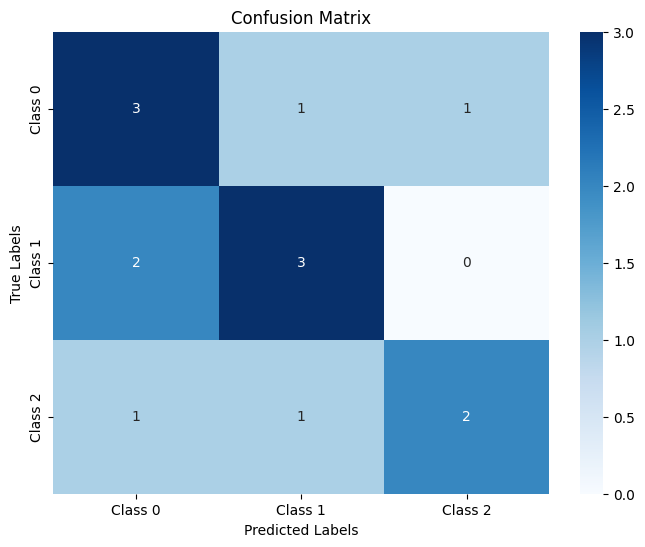

In [ ]:
#Calculate and Display the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate and Display the Classification Report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2'], digits=2)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.50      0.60      0.55         5
     Class 1       0.60      0.60      0.60         5
     Class 2       0.67      0.50      0.57         4

    accuracy                           0.57        14
   macro avg       0.59      0.57      0.57        14
weighted avg       0.58      0.57      0.57        14



In [ ]:
#Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2'], digits=2)
print("Classification Report:\n", report)



Classification Report:
               precision    recall  f1-score   support

     Class 0       0.50      0.60      0.55         5
     Class 1       0.60      0.60      0.60         5
     Class 2       0.67      0.50      0.57         4

    accuracy                           0.57        14
   macro avg       0.59      0.57      0.57        14
weighted avg       0.58      0.57      0.57        14



In [ ]:
#Calculate and Display Overall Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5714285714285714


In [ ]:
# One-Hot Encoding of y_test and y_pred for ROC and Precision-Recall Curves
n_classes = len(np.unique(y_test))  # Number of classes
y_test_bin = np.eye(n_classes)[y_test]  # One-hot encoding for y_test
y_pred_bin = np.eye(n_classes)[y_pred]  # One-hot encoding for y_pred


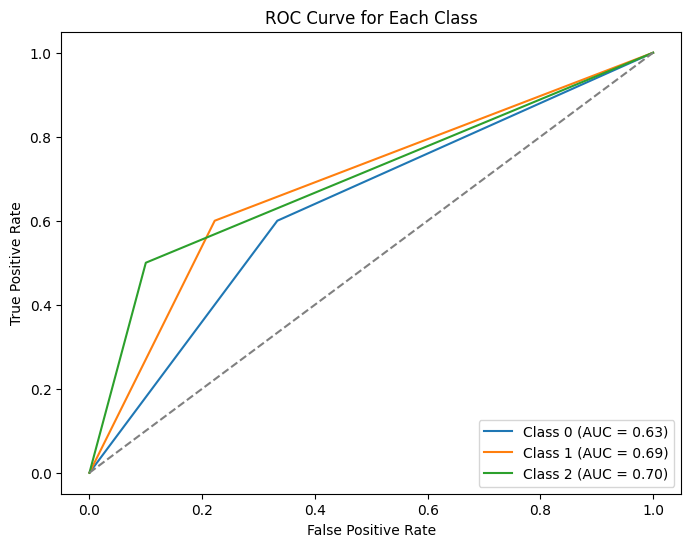

In [ ]:
#Plotting ROC Curves for Each Class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()

*Clasificadores*

arboles de desicion

usar dataset digits
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target
para crear dps modelos de clasificacion
KNN
maquina de soiporte vectorial
arboles de desicones
bosque aleatorio
regresion logista

realizar un reporte de clasificacion y matriz de confusion


In [ ]:
# Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target


In [ ]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
#Define the models
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000)
}



Model: K-Nearest Neighbors
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       0.98      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



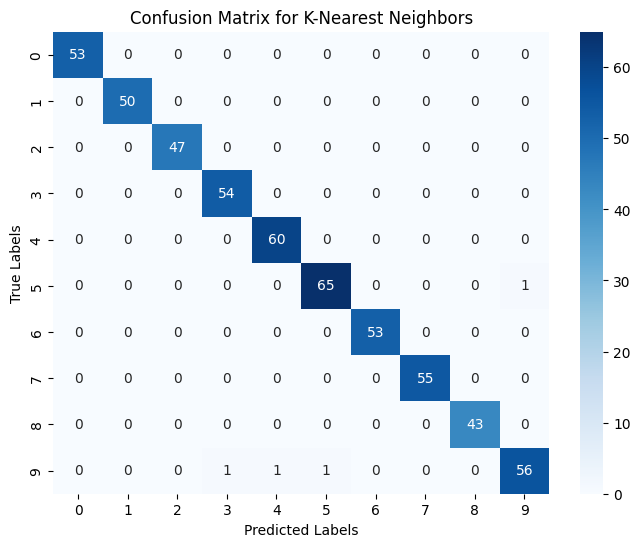


Model: Support Vector Machine
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      0.98      0.98        54
           4       1.00      1.00      1.00        60
           5       1.00      0.98      0.99        66
           6       0.98      1.00      0.99        53
           7       0.98      0.98      0.98        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



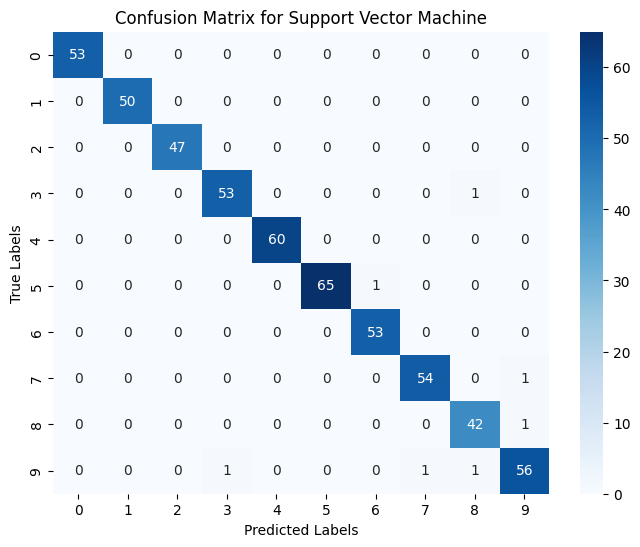


Model: Decision Tree
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93        53
           1       0.75      0.72      0.73        50
           2       0.73      0.77      0.75        47
           3       0.82      0.87      0.85        54
           4       0.85      0.83      0.84        60
           5       0.94      0.91      0.92        66
           6       0.89      0.92      0.91        53
           7       0.85      0.84      0.84        55
           8       0.79      0.79      0.79        43
           9       0.84      0.86      0.85        59

    accuracy                           0.85       540
   macro avg       0.84      0.84      0.84       540
weighted avg       0.85      0.85      0.85       540



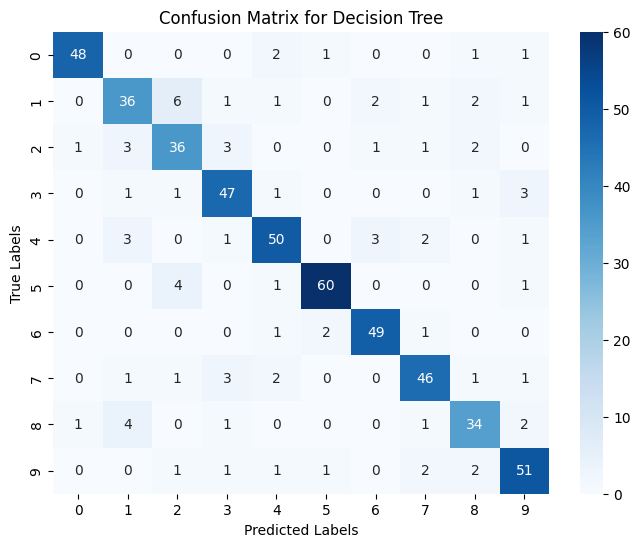


Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.94      1.00      0.97        50
           2       1.00      0.98      0.99        47
           3       0.98      0.94      0.96        54
           4       0.97      1.00      0.98        60
           5       0.98      0.97      0.98        66
           6       0.98      0.98      0.98        53
           7       0.95      0.98      0.96        55
           8       0.93      0.95      0.94        43
           9       0.98      0.93      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



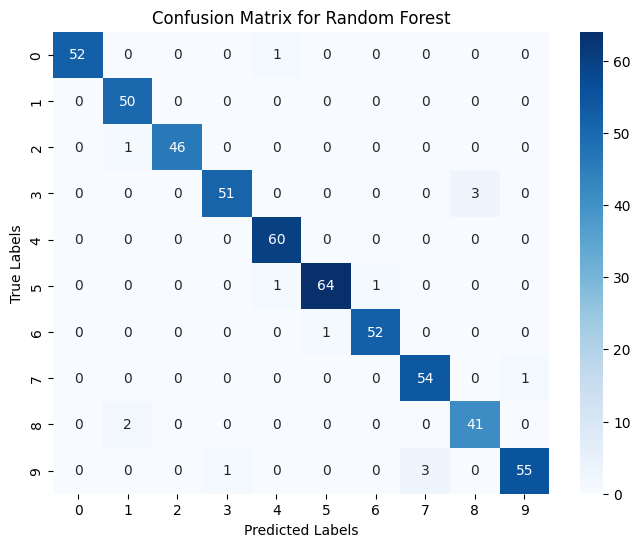


Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.94      0.95        50
           2       0.96      1.00      0.98        47
           3       0.98      0.96      0.97        54
           4       1.00      0.97      0.98        60
           5       0.94      0.95      0.95        66
           6       0.96      0.98      0.97        53
           7       1.00      0.96      0.98        55
           8       0.91      0.98      0.94        43
           9       0.97      0.95      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



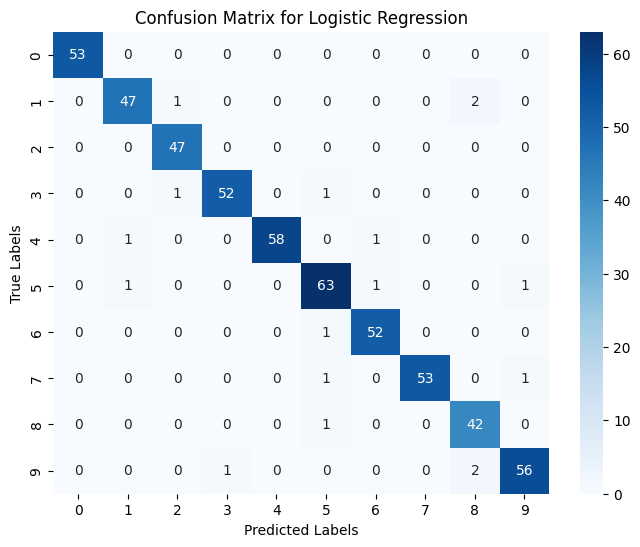

In [ ]:

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Generate classification report and confusion matrix
    print(f"\nModel: {model_name}")
    print("Classification Report:\n", classification_report(y_test, y_pred, digits=2))

    # Plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=digits.target_names, yticklabels=digits.target_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


# Kmean


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [ ]:
#Load the Iris dataset
iris = load_iris()

X = iris.data
y = iris.target


In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:

#Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=3, random_state=42)

In [ ]:
#Predict the clusters
y_kmeans = kmeans.predict(X)


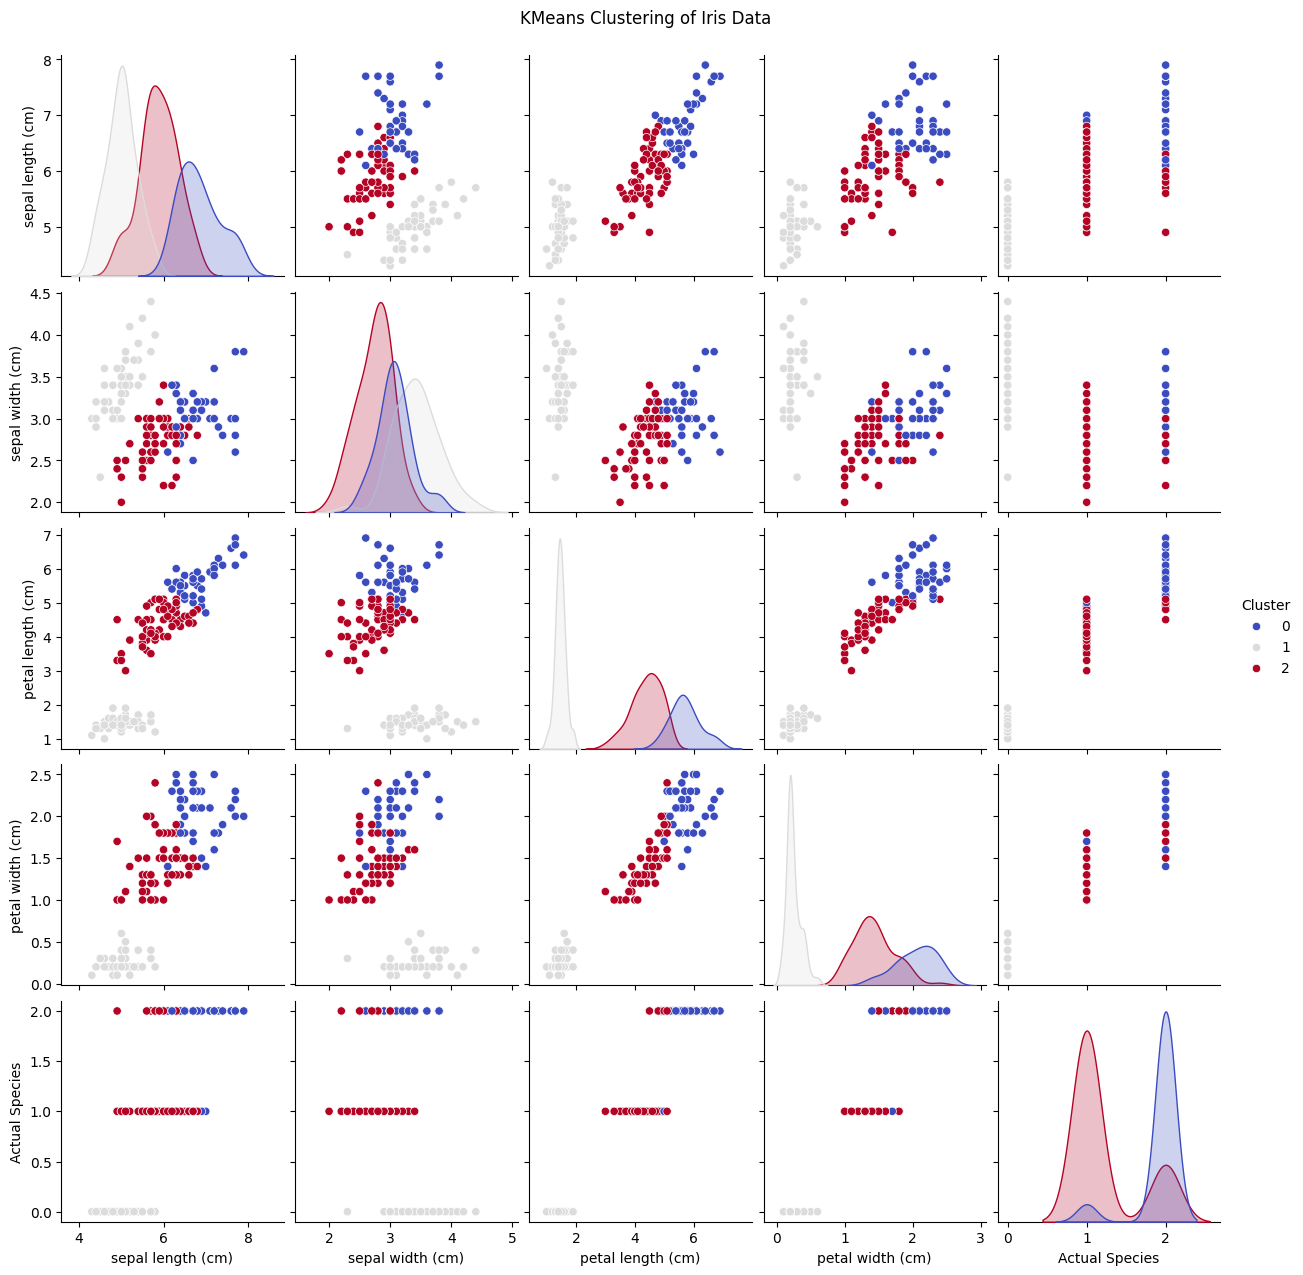

In [ ]:
# Visualize the KMeans Clustering vs Actual Labels
# Convert to DataFrame for easier plotting
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['Actual Species'] = y
iris_df['Cluster'] = y_kmeans
# Visualize: Pair plot to see how clusters match actual species
sns.pairplot(iris_df, hue='Cluster', palette='coolwarm', diag_kind='kde')
plt.suptitle('KMeans Clustering of Iris Data', y=1.02)
plt.show()


In [ ]:

#Evaluate the clusters (optional comparison with true labels)
#created by Gemini
from sklearn.metrics import accuracy_score
# Note: Since clusters have no labels, accuracy_score needs remapping of clusters to true labels
# We can evaluate the "cluster-to-label mapping" for a more meaningful comparison
print("Cluster centers:\n", kmeans.cluster_centers_)


Cluster centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]



# Analisis de componentes principales




reduccion de la dimensionalidad

cargar dataset iris
-hacer PCA con 2 componentes
hacer agrupamiento kmeans
agregar columna de etiqueta de grupo y visualizar
graficar clusters


In [ ]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [ ]:
#Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
print(iris.data)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
#Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [ ]:
#Apply KMeans clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
clusters = kmeans.predict(X_pca)



In [ ]:
#Add the cluster labels and PCA components to a DataFrame
iris_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
iris_df['Cluster'] = clusters
iris_df['Actual Species'] = y


In [ ]:
# Analyze and visualize the PCA components (Explained Variance)
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance of each PCA component: {explained_variance}")


Explained Variance of each PCA component: [0.92461872 0.05306648]


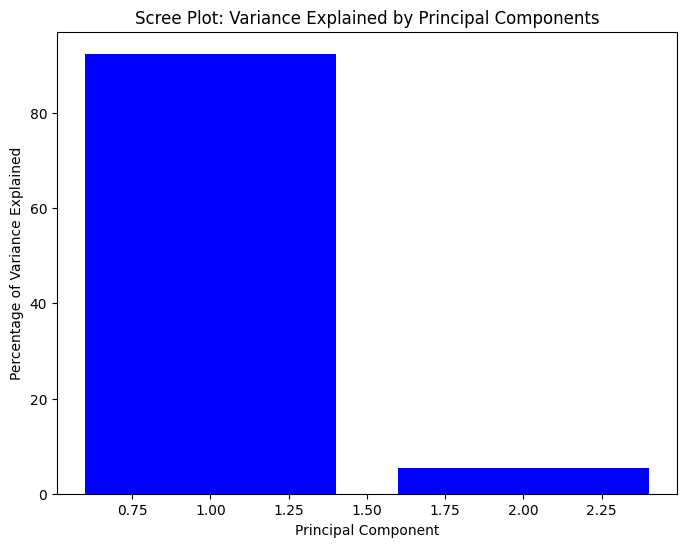

In [ ]:
# Scree Plot to visualize variance explained by each component
# created by Gemini
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained')
plt.title('Scree Plot: Variance Explained by Principal Components')
plt.show()


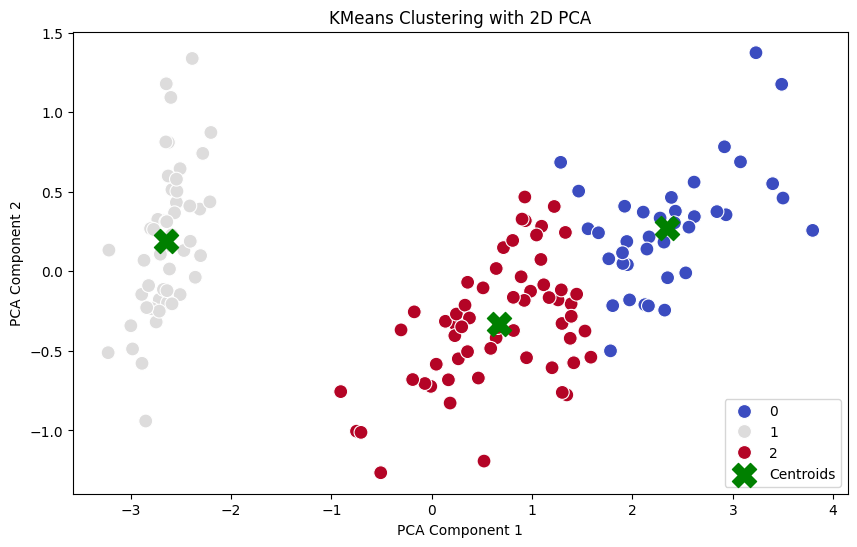

In [ ]:
#Visualize the PCA components and clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='coolwarm', data=iris_df, s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='green', label='Centroids', marker='X')
plt.title('KMeans Clustering with 2D PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


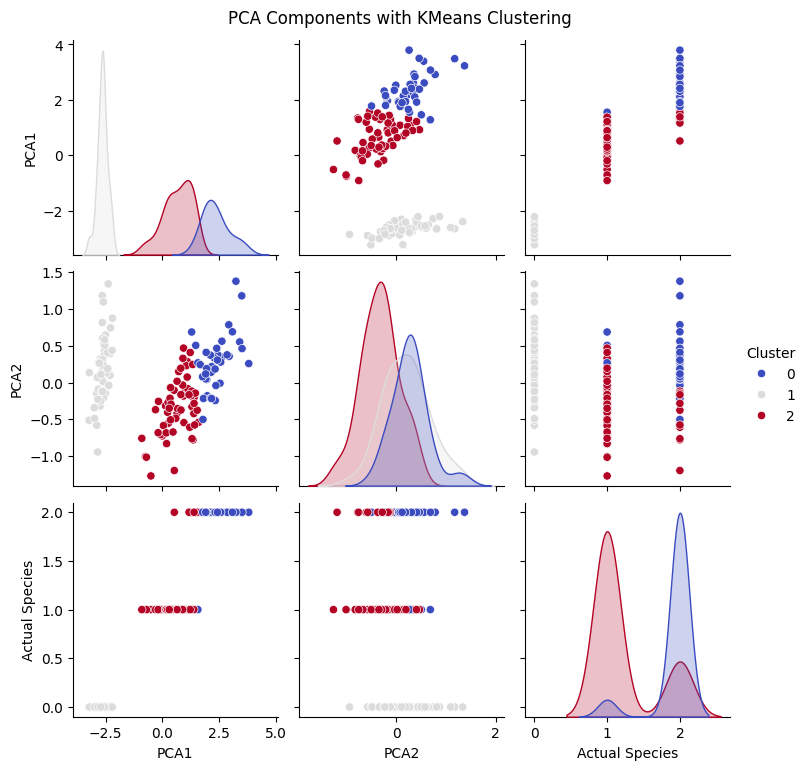

In [ ]:
#Display the principal components with the corresponding species in a pair plot (optional)
sns.pairplot(iris_df, hue='Cluster', palette='coolwarm', diag_kind='kde')
plt.suptitle('PCA Components with KMeans Clustering', y=1.02)
plt.show()


# Distancia Jaccard

In [ ]:
d = 1- |AnB|/|AuB|

Distancia Canberra

[500000, -400000] vs [-0.02, 0.9]

 Mean Shift

 #  Mean Shift

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [ ]:
# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data
wine.data


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
# Step 2: Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
# Step 3: Use the Elbow Method to find the optimal number of clusters for KMeans
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)



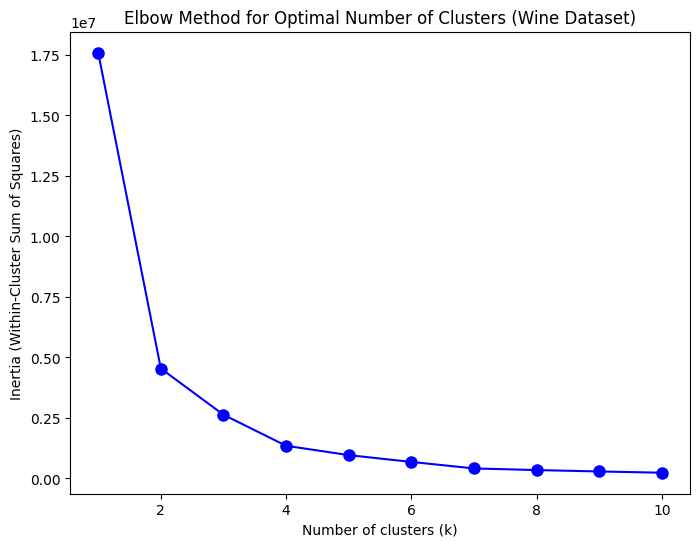

In [ ]:
# Step 4: Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters (Wine Dataset)')
plt.show()



In [ ]:
# Step 5: Apply KMeans and Gaussian Mixture Model using the optimal k (from the elbow)
# Assuming we identify the elbow at k=3 (for example)
optimal_k = 6

# KMeans Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)



Text(0, 0.5, 'PCA Component 2')

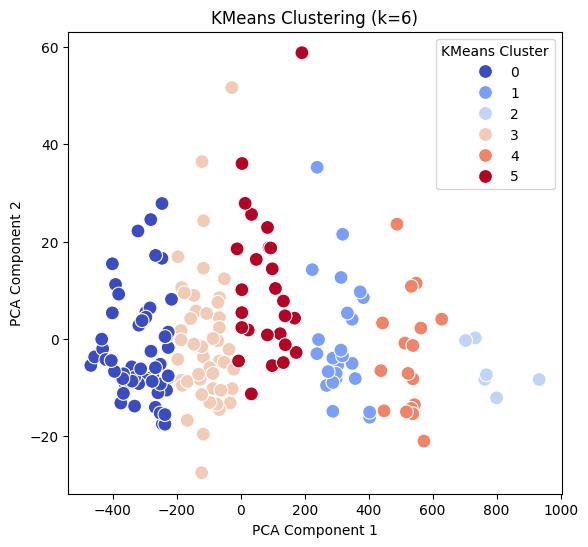

In [ ]:
# Step 6: Create a DataFrame for plotting
wine_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
wine_df['KMeans Cluster'] = kmeans_labels
wine_df['GMM Cluster'] = gmm_labels

# Step 7: Visualize the clustering results for both KMeans and GMM

plt.figure(figsize=(14, 6))

# KMeans Clustering
plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans Cluster', palette='coolwarm', data=wine_df, s=100)
plt.title(f'KMeans Clustering (k={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')


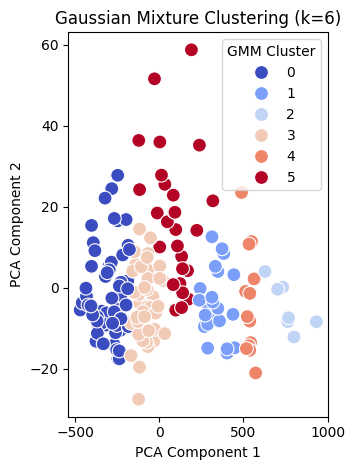

In [ ]:
# GMM Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x='PCA1', y='PCA2', hue='GMM Cluster', palette='coolwarm', data=wine_df, s=100)
plt.title(f'Gaussian Mixture Clustering (k={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


In [ ]:
# Import  libraries
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [ ]:

# Load the Wine dataset
wine = load_wine()
X = wine.data


In [ ]:

# Use the Elbow Method to find the optimal number of clusters for KMeans
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


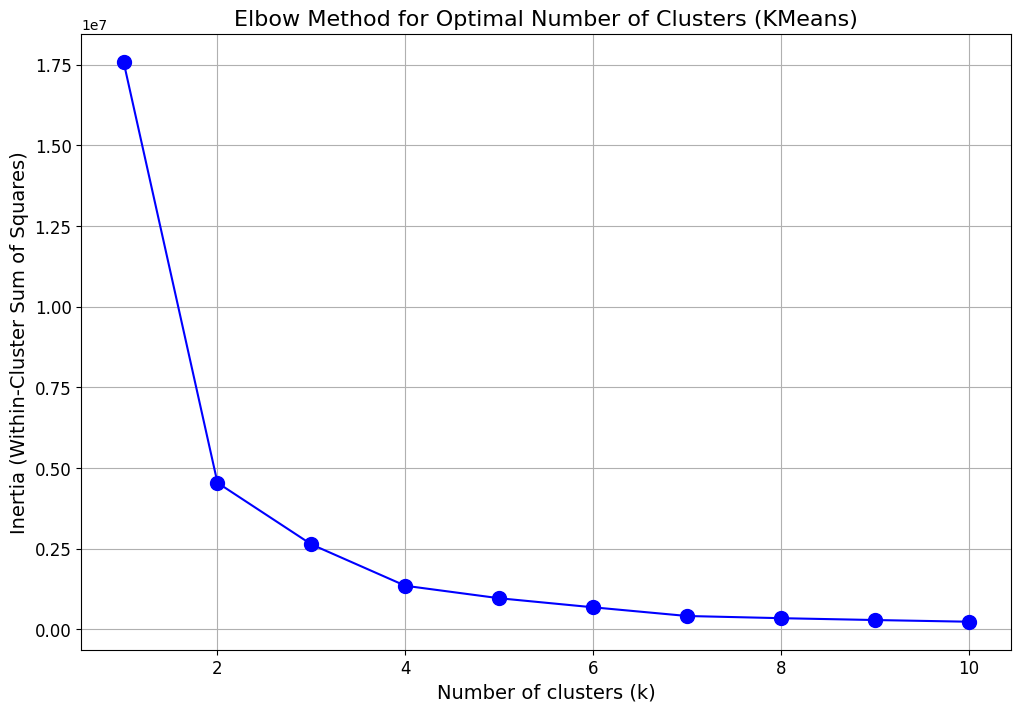

In [ ]:

#  Plot the Elbow Curve for KMeans with larger size
plt.figure(figsize=(12, 8))  # Increased figure size
plt.plot(k_values, inertia, 'bo-', markersize=10)
plt.xlabel('Number of clusters (k)', fontsize=14)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=14)
plt.title('Elbow Method for Optimal Number of Clusters (KMeans)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()


In [ ]:

#  Apply Gaussian Mixture Model to find the optimal number of clusters
gmm_bic = []
for k in range(1, 11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    gmm_bic.append(gmm.bic(X))


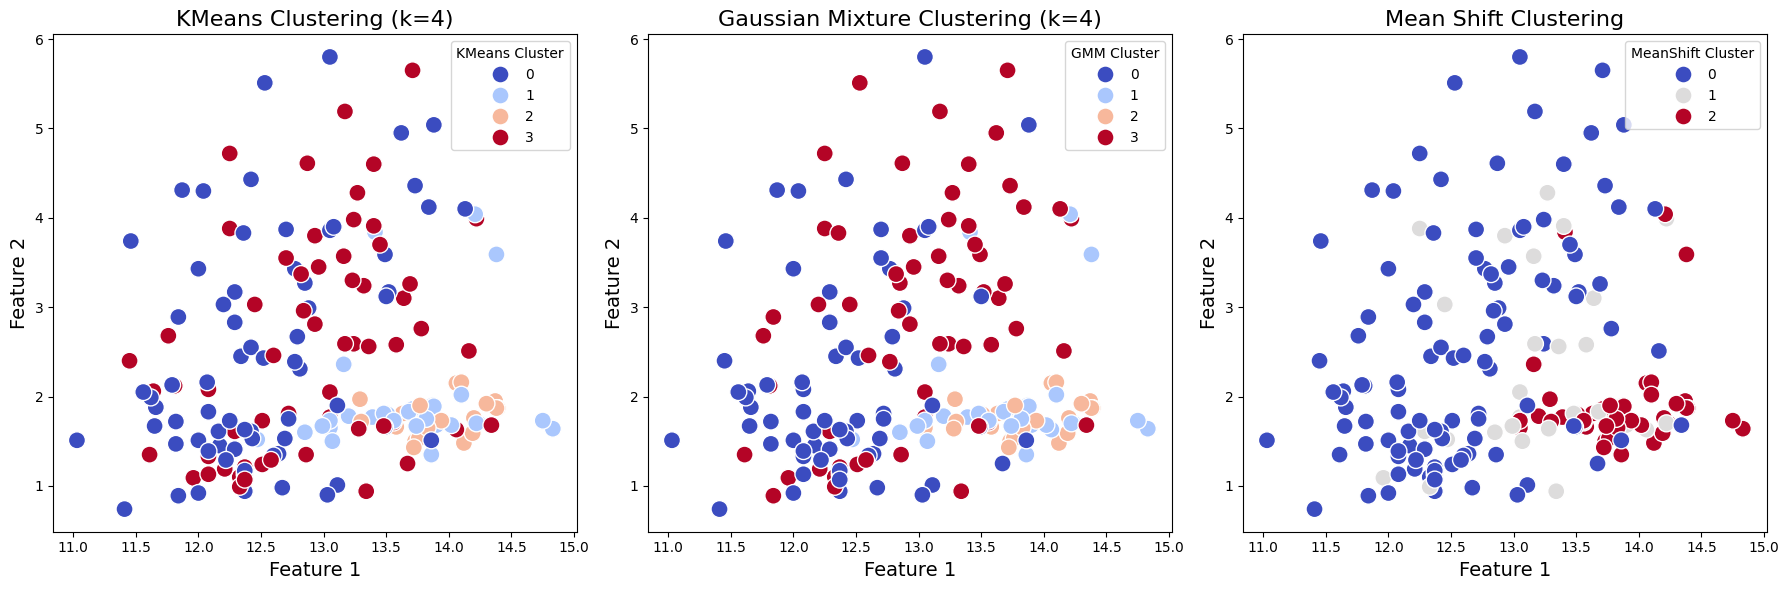

In [ ]:

# Apply KMeans, Gaussian Mixture Model, and Mean Shift clustering
optimal_k = 4

plt.figure(figsize=(18, 6))

# KMeans Clustering
plt.subplot(1, 3, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue='KMeans Cluster', palette='coolwarm', data=wine_df, s=150)
plt.title(f'KMeans Clustering (k={optimal_k})', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)

# GMM Clustering
plt.subplot(1, 3, 2)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue='GMM Cluster', palette='coolwarm', data=wine_df, s=150)
plt.title(f'Gaussian Mixture Clustering (k={optimal_k})', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)

# Mean Shift Clustering
plt.subplot(1, 3, 3)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue='MeanShift Cluster', palette='coolwarm', data=wine_df, s=150)
plt.title('Mean Shift Clustering', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)

plt.tight_layout()
plt.show()

# Sección nueva

actividad de replicas

buscar en Kaggle dos datasets distintos a los ya usados,

Reference-how to run clusterinG WINE KMEANS


Buscar en Kaggle dos datasets (distintos a los ya usados, por ejemplo: café, clientes, estudiantes, etc..) y usar cada uno en los dos notebooks llamados:


Copia de comparison-of-a-range-of-clustering-algorithms.ipynb

REFERENCE-how-to-run-Clustering wine_ K-means + PCA or UMAP.ipynb (entrar directamente a: https://www.kaggle.com/code/dexmasa/clustering-wine-k-means-pca-or-umap/notebook)



# Redes Neuronales


In [ ]:
import numpy as np

# Define the activation function (Step function)
def step_function(x):
    return 1 if x >= 0 else 0


In [ ]:
# Training function for the perceptron
#use by gemini
def train_perceptron(X, y, learning_rate=0.01, max_iters=1000):
    num_samples, num_features = X.shape

    # Initialize weights and bias randomly
    weights = np.random.randn(num_features)
    bias = np.random.randn()

    # Training loop
    for iteration in range(max_iters):
        errors = 0  # Track number of errors in each iteration

        # Iterate over each sample in the dataset
        for i in range(num_samples):
            # Calculate the perceptron's output (dot product + bias)
            linear_output = np.dot(X[i], weights) + bias
            y_pred = step_function(linear_output)

            # Calculate the error (difference between prediction and actual label)
            error = y[i] - y_pred

            # Update weights and bias if there's an error
            if error != 0:
                weights += learning_rate * error * X[i]
                bias += learning_rate * error
                errors += 1

        # If no errors are found, training is complete
        if errors == 0:
            print(f"Training completed in {iteration + 1} iterations.")
            break
    else:
        print("Reached the maximum number of iterations without convergence.")

    return weights, bias


In [ ]:
# Prediction function for the perceptron
def predict_perceptron(X, weights, bias):
    # Calculate the output using the trained weights and bias
    linear_output = np.dot(X, weights) + bias
    return np.array([step_function(x) for x in linear_output])


X = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])

y = np.array([0, 0, 1, 1])  # Expected output (OR logic)

# Train the perceptron
weights, bias = train_perceptron(X, y, learning_rate=0.1, max_iters=1000)

# Make predictions using the trained perceptron
output = predict_perceptron(X, weights, bias)
print(f'Perceptron output after training:\n{output}')


Training completed in 5 iterations.
Perceptron output after training:
[0 0 1 1]


Modelos del Caso de Estudio para proyecto final de los Bootcamps de Talento Tech

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

# Cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost



In [ ]:
# Gradient descent function
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(y)
    cost_history = []  # To store the cost at each step
    theta_history = []  # To store theta values at each step

    for epoch in range(epochs):
        # Make predictions
        predictions = X.dot(theta)

        #Calculate error
        error = predictions - y

        #Compute gradient
        gradient = (1/m) * X.T.dot(error)

        #Update parameters (theta)
        theta = theta - alpha * gradient

        # Store the cost and theta values at each step
        cost_history.append(compute_cost(X, y, theta))
        theta_history.append(theta.copy())

        # Display progress every 1000 epochs
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: Cost = {compute_cost(X, y, theta)}")

    return theta, cost_history, theta_history



In [ ]:
# Plotting the cost function and gradient descent
def plot_gradient_descent(cost_history, theta_history):
    plt.figure(figsize=(8, 6))

    # Plot the cost function history
    plt.plot(cost_history, color='blue', label='Cost function')

    # Plot the gradient descent steps in red
    plt.scatter(range(len(cost_history)), cost_history, color='red', marker='x', label='Gradient descent steps')

    plt.title('Gradient Descent and Cost Function History')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.show()




Epoch 0: Cost = 33.97930208148007
Optimal parameters: [[2.44683063]
 [3.661006  ]]


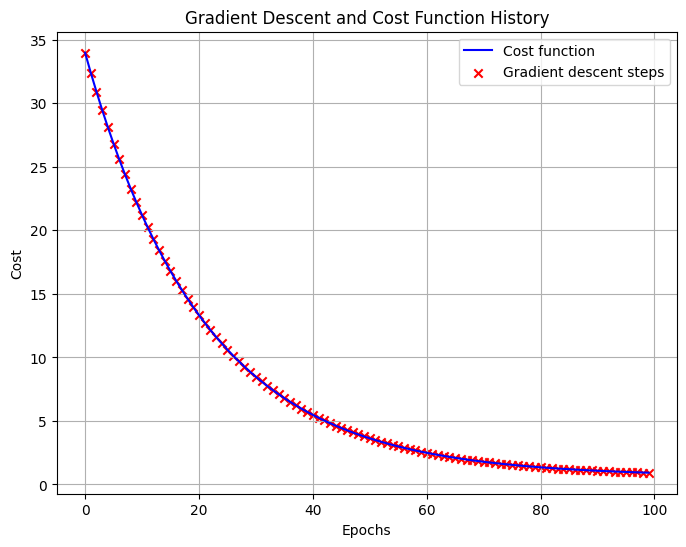

In [ ]:
# Example usage:

X = 2 * np.random.rand(100, 1)  # 100 random points
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear function with noise

# Add a column of ones for the intercept term
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters
theta_initial = np.random.randn(2, 1)  # Two parameters (intercept and slope)
alpha = 0.01  # Learning rate
epochs = 100  # Number of iterations

# Call the gradient descent function
theta_optimal, cost_history, theta_history = gradient_descent(X_b, y, theta_initial, alpha, epochs)

# Print the final optimal parameters
print(f"Optimal parameters: {theta_optimal}")

# Plot the cost function history and gradient descent steps
plot_gradient_descent(cost_history, theta_history)

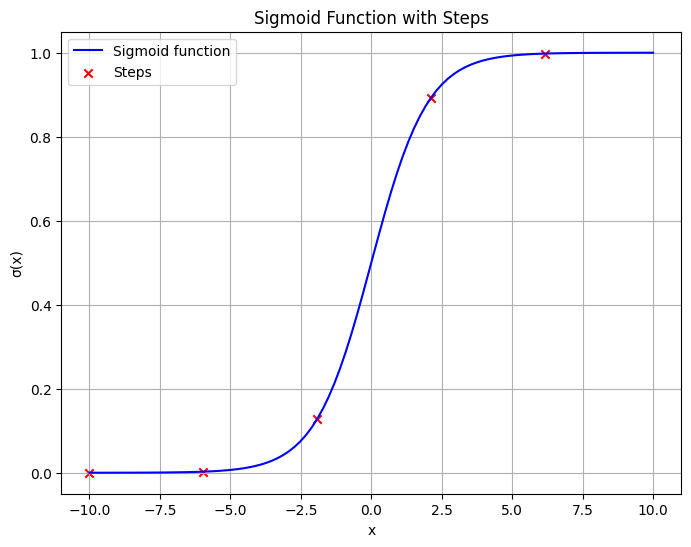

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plotting the sigmoid function with steps
def plot_sigmoid_with_steps():
    x_values = np.linspace(-10, 10, 100)  # Generate 100 values from -10 to 10
    y_values = sigmoid(x_values)          # Apply sigmoid to each x value

    # Select some step points to highlight (for example: every 20th point)
    step_indices = np.arange(0, len(x_values), 20)  # Every 20th point
    x_steps = x_values[step_indices]
    y_steps = y_values[step_indices]

    # Plot the sigmoid function
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, color='blue', label='Sigmoid function')

    # Plot the steps as red markers
    plt.scatter(x_steps, y_steps, color='red', marker='x', label='Steps')

    plt.title('Sigmoid Function with Steps')
    plt.xlabel('x')
    plt.ylabel('σ(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
plot_sigmoid_with_steps()


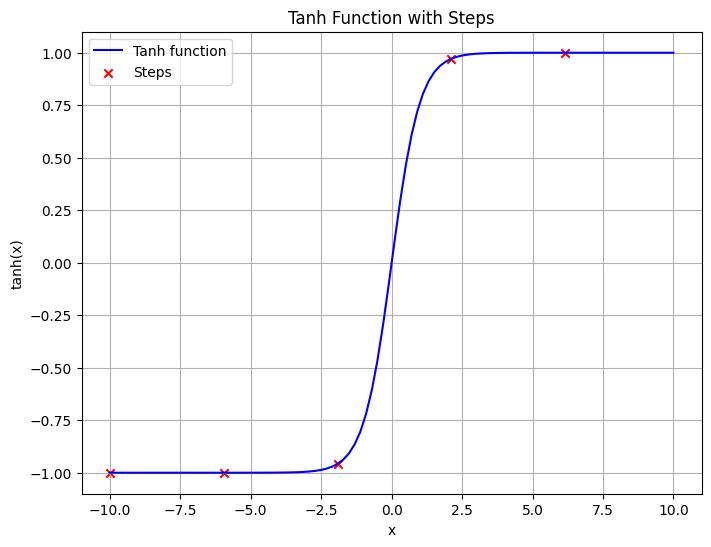

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperbolic Tangent function
def tanh(x):
    return np.tanh(x)

# Plotting the tanh function with steps
def plot_tanh_with_steps():
    x_values = np.linspace(-10, 10, 100)  # Generate 100 values from -10 to 10
    y_values = tanh(x_values)             # Apply tanh to each x value

    # Select some step points to highlight (for example: every 20th point)
    step_indices = np.arange(0, len(x_values), 20)  # Every 20th point
    x_steps = x_values[step_indices]
    y_steps = y_values[step_indices]

    # Plot the tanh function
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, color='blue', label='Tanh function')

    # Plot the steps as red markers
    plt.scatter(x_steps, y_steps, color='red', marker='x', label='Steps')

    plt.title('Tanh Function with Steps')
    plt.xlabel('x')
    plt.ylabel('tanh(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
plot_tanh_with_steps()


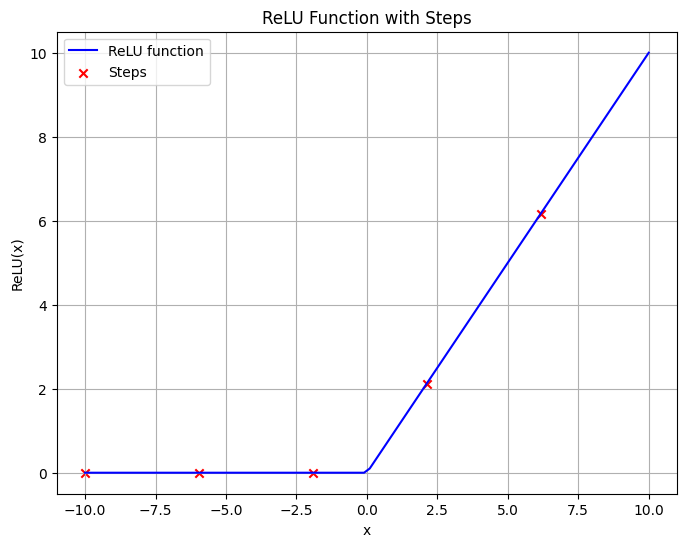

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ReLU function
def relu(x):
    return np.maximum(0, x)

# Plotting the ReLU function with steps
def plot_relu_with_steps():
    x_values = np.linspace(-10, 10, 100)  # Generate 100 values from -10 to 10
    y_values = relu(x_values)             # Apply ReLU to each x value

    # Select some step points to highlight (for example: every 20th point)
    step_indices = np.arange(0, len(x_values), 20)  # Every 20th point
    x_steps = x_values[step_indices]
    y_steps = y_values[step_indices]

    # Plot the ReLU function
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, color='blue', label='ReLU function')

    # Plot the steps as red markers
    plt.scatter(x_steps, y_steps, color='red', marker='x', label='Steps')

    plt.title('ReLU Function with Steps')
    plt.xlabel('x')
    plt.ylabel('ReLU(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
plot_relu_with_steps()


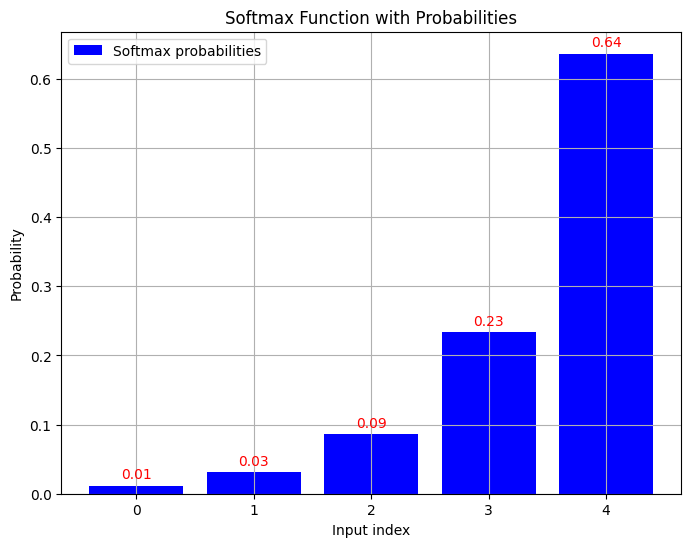

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z, axis=0)

# Plotting the Softmax function applied to a vector with steps
def plot_softmax_with_steps():
    x_values = np.linspace(-2, 2, 5)  # Simulate a small vector of 5 values
    y_values = softmax(x_values)      # Apply softmax to the vector

    # Plot the Softmax function results as a bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(x_values)), y_values, color='blue', label='Softmax probabilities')

    # Plot the steps as red markers
    for i in range(len(x_values)):
        plt.text(i, y_values[i] + 0.01, f'{y_values[i]:.2f}', ha='center', color='red')

    plt.title('Softmax Function with Probabilities')
    plt.xlabel('Input index')
    plt.ylabel('Probability')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
plot_softmax_with_steps()


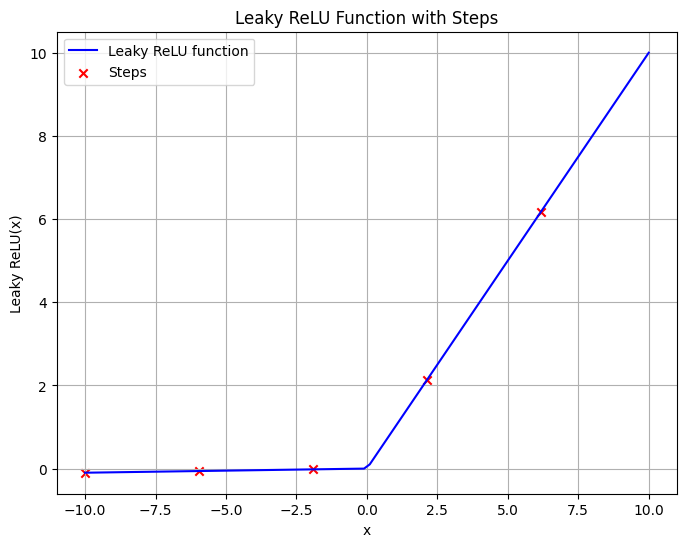

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Leaky ReLU function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Plotting the Leaky ReLU function with steps
def plot_leaky_relu_with_steps():
    x_values = np.linspace(-10, 10, 100)  # Generate 100 values from -10 to 10
    y_values = leaky_relu(x_values)       # Apply Leaky ReLU to each x value

    # Select some step points to highlight (for example: every 20th point)
    step_indices = np.arange(0, len(x_values), 20)  # Every 20th point
    x_steps = x_values[step_indices]
    y_steps = y_values[step_indices]

    # Plot the Leaky ReLU function
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, color='blue', label='Leaky ReLU function')

    # Plot the steps as red markers
    plt.scatter(x_steps, y_steps, color='red', marker='x', label='Steps')

    plt.title('Leaky ReLU Function with Steps')
    plt.xlabel('x')
    plt.ylabel('Leaky ReLU(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
plot_leaky_relu_with_steps()


Ejecicio


### reduccion


ejecicio



In [ ]:
pip install numpy pandas tensorflow scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Load the dataset from a CSV file
# Replace 'dataset.csv' with the path to your actual dataset file
data = pd.read_csv('multiple_linear_regression_dataset.csv')
data.head()
data


age  experience  income
0    25           1   30450
1    30           3   35670
2    47           2   31580
3    32           5   40130
4    43          10   47830
5    51           7   41630
6    28           5   41340
7    33           4   37650
8    37           5   40250
9    39           8   45150
10   29           1   27840
11   47           9   46110
12   54           5   36720
13   51           4   34800
14   44          12   51300
15   41           6   38900
16   58          17   63600
17   23           1   30870
18   44           9   44190
19   37          10   48700

In [ ]:
# Prepare the features (X) and target (y)
X = data[['age', 'experience']]  # Features
y = data['income']  # Target


In [ ]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Keras model for linear regression
def create_keras_model(input_dim, hidden_layers=[10, 5], learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.InputLayer(input_shape=(input_dim,)))  # Input layer
    for units in hidden_layers:
        model.add(layers.Dense(units, activation='linear'))  # Hidden layers with linear activation
    model.add(layers.Dense(1))  # Output layer for regression
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model
# Train the Keras model
keras_model = create_keras_model(input_dim=X_train.shape[1])
keras_model.fit(X_train, y_train, epochs=100, verbose=0)

# Train an MLPRegressor from scikit-learn
mlp_model = MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Predictions
keras_predictions = keras_model.predict(X_test)
mlp_predictions = mlp_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


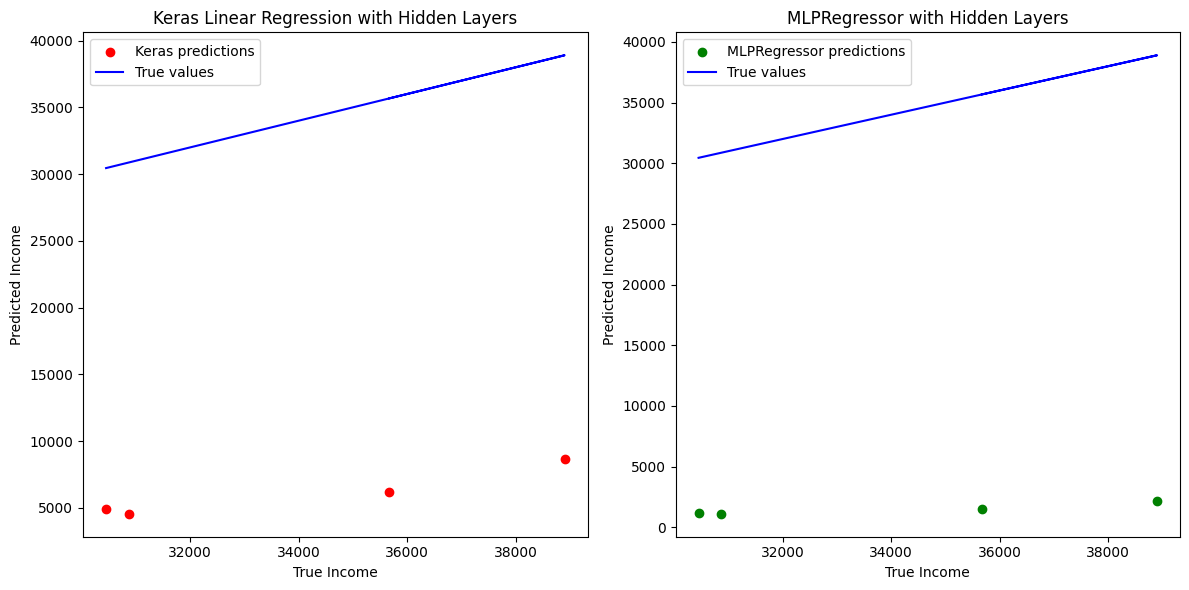

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 6))

# Keras predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, keras_predictions, color='red', label='Keras predictions')
plt.plot(y_test, y_test, color='blue', label='True values')  # Line of perfect prediction
plt.title('Keras Linear Regression with Hidden Layers')
plt.xlabel('True Income')
plt.ylabel('Predicted Income')
plt.legend()

# MLP predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, mlp_predictions, color='green', label='MLPRegressor predictions')
plt.plot(y_test, y_test, color='blue', label='True values')  # Line of perfect prediction
plt.title('MLPRegressor with Hidden Layers')
plt.xlabel('True Income')
plt.ylabel('Predicted Income')
plt.legend()

plt.tight_layout()
plt.show()


# Clasificacion

Dataset Diabetes y clasificacion con redes neuronales

---
data set para clasificacion y regression



In [ ]:
!pip install tensorflow


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


data = pd.read_csv('diabetes.csv')
data.head()
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [ ]:
# Preprocess the data
# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target (1 = Diabetic, 0 = Non-Diabetic)

# Normalize the feature data for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
#Create the neural network model
model = Sequential()

# Input layer with 8 features (corresponding to the columns) and two hidden layers
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with 16 units
model.add(Dense(8, activation='relu'))  # Second hidden layer with 8 units
model.add(Dense(1, activation='sigmoid'))  # Output layer (1 output node for binary classification)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4749 - loss: 0.7034 - val_accuracy: 0.7273 - val_loss: 0.6311
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6828 - loss: 0.6317 - val_accuracy: 0.7078 - val_loss: 0.5948
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6931 - loss: 0.5979 - val_accuracy: 0.7208 - val_loss: 0.5635
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7627 - loss: 0.5239 - val_accuracy: 0.7273 - val_loss: 0.5407
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7522 - loss: 0.5089 - val_accuracy: 0.7338 - val_loss: 0.5252
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7829 - loss: 0.4919 - val_accuracy: 0.7468 - val_loss: 0.5216
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7880 - loss: 0.4771 - val_accuracy: 0.7532 - val_loss: 0.5199
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7725 - loss: 0.4538 - val_accuracy: 0.7403 -

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Make predictions on the test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Predictions (threshold set at 0.5)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7420 - loss: 0.6042 

Test Accuracy: 0.7403
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

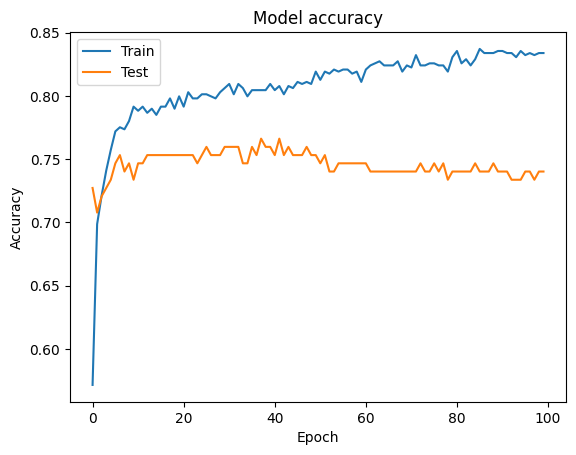

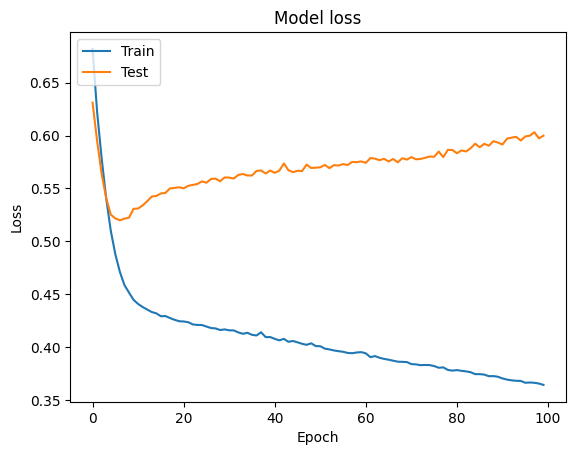

In [ ]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
#MSClassifier

Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        99
           1       0.70      0.69      0.70        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77 

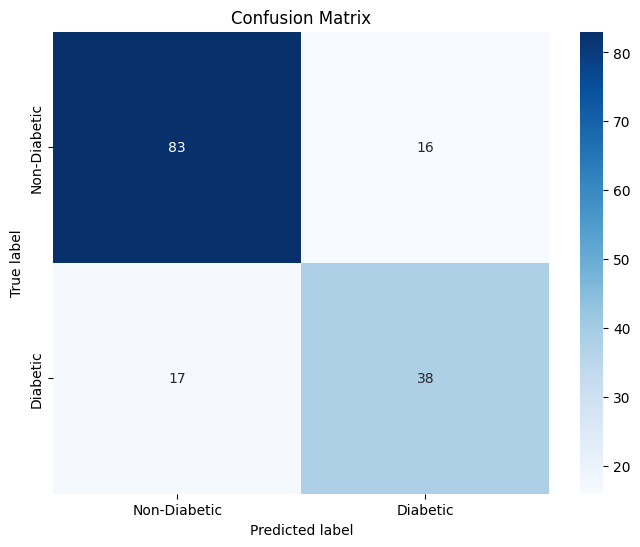

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Step 2: Preprocess the data
# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1)  # Features (all except the Outcome column)
y = data['Outcome']  # Target (1 = Diabetic, 0 = Non-Diabetic)

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Create and train the MLPClassifier (neural network)
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=500, activation='relu', solver='adam', random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = mlp.predict(X_test)

# Step 5: Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 6: Visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Crear dos modelos con Keras y MLPClassifier
Hacer matríz de confusión y reporte

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame= True)
from sklearn.datasets import load_wine

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# For Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# For MLPClassifier
from sklearn.neural_network import MLPClassifier

# Load datasets
from sklearn.datasets import load_breast_cancer, load_wine

In [ ]:
# Load breast cancer dataset
cancer_data = load_breast_cancer(as_frame=True)
cancer_data
X_cancer = cancer_data.data
y_cancer = cancer_data.target

In [ ]:
cancer_data.data

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [ ]:
# prompt: saber cuantas columnas tengo nde cancer_data

# Assuming cancer_data is your DataFrame loaded from load_breast_cancer
num_columns = len(cancer_data.data.columns)

print(f"The cancer_data DataFrame has {num_columns} columns.")

The cancer_data DataFrame has 30 columns.


In [ ]:
# Split the data
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_cancer_scaled = scaler.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler.transform(X_test_cancer)

# Define the Keras model
model_keras_cancer = Sequential([
    Dense(32, input_dim=X_train_cancer.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model_keras_cancer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_keras_cancer.fit(X_train_cancer_scaled, y_train_cancer, epochs=100, batch_size=10, verbose=0)

# Predict and evaluate
y_pred_keras_cancer = (model_keras_cancer.predict(X_test_cancer_scaled) > 0.5).astype("int32")
print("Keras Model - Breast Cancer Dataset")
print(confusion_matrix(y_test_cancer, y_pred_keras_cancer))
print(classification_report(y_test_cancer, y_pred_keras_cancer))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Keras Model - Breast Cancer Dataset
[[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# Define the Keras model
model_keras_cancer = Sequential([
    Dense(32, input_dim=X_train_cancer.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model_keras_cancer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_keras_cancer.fit(X_train_cancer_scaled, y_train_cancer, epochs=100, batch_size=10, verbose=0)

# Predict and evaluate
y_pred_keras_cancer = (model_keras_cancer.predict(X_test_cancer_scaled) > 0.5).astype("int32")
print("Keras Model - Breast Cancer Dataset")
print(confusion_matrix(y_test_cancer, y_pred_keras_cancer))
print(classification_report(y_test_cancer, y_pred_keras_cancer))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Keras Model - Breast Cancer Dataset
[[41  2]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
model_keras_cancer.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,613 (18.02 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,076 (12.02 KB)

In [ ]:
# Define the MLPClassifier model
mlp_cancer = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42)

# Train the model
mlp_cancer.fit(X_train_cancer_scaled, y_train_cancer)

# Predict and evaluate
y_pred_mlp_cancer = mlp_cancer.predict(X_test_cancer_scaled)
print("MLPClassifier Model - Breast Cancer Dataset")
print(confusion_matrix(y_test_cancer, y_pred_mlp_cancer))
print(classification_report(y_test_cancer, y_pred_mlp_cancer))


MLPClassifier Model - Breast Cancer Dataset
[[41  2]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
# Load wine dataset
wine_data = load_wine(as_frame=True)
X_wine = wine_data.data
y_wine = wine_data.target

# Split the data
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

# Normalize the data
X_train_wine_scaled = scaler.fit_transform(X_train_wine)
X_test_wine_scaled = scaler.transform(X_test_wine)

# Keras model for wine dataset
model_keras_wine = Sequential([
    Dense(32, input_dim=X_train_wine.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # Multi-class classification
])

# Compile the model
model_keras_wine.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_keras_wine.fit(X_train_wine_scaled, y_train_wine, epochs=100, batch_size=10, verbose=0)

# Predict and evaluate
y_pred_keras_wine = np.argmax(model_keras_wine.predict(X_test_wine_scaled), axis=-1)
print("Keras Model - Wine Dataset")
print(confusion_matrix(y_test_wine, y_pred_keras_wine))
print(classification_report(y_test_wine, y_pred_keras_wine))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Keras Model - Wine Dataset
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
# Define MLPClassifier model
mlp_wine = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42)

# Train the model
mlp_wine.fit(X_train_wine_scaled, y_train_wine)

# Predict and evaluate
y_pred_mlp_wine = mlp_wine.predict(X_test_wine_scaled)
print("MLPClassifier Model - Wine Dataset")
print(confusion_matrix(y_test_wine, y_pred_mlp_wine))
print(classification_report(y_test_wine, y_pred_mlp_wine))


MLPClassifier Model - Wine Dataset
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



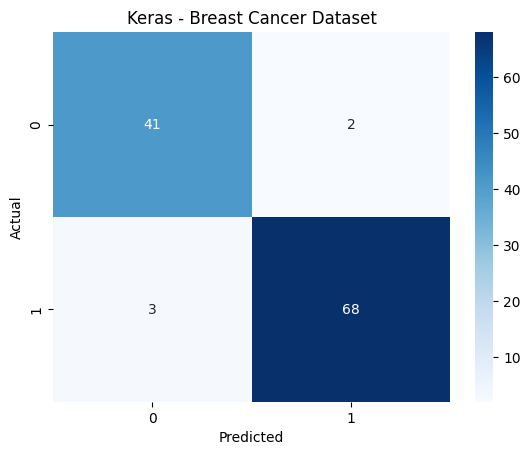

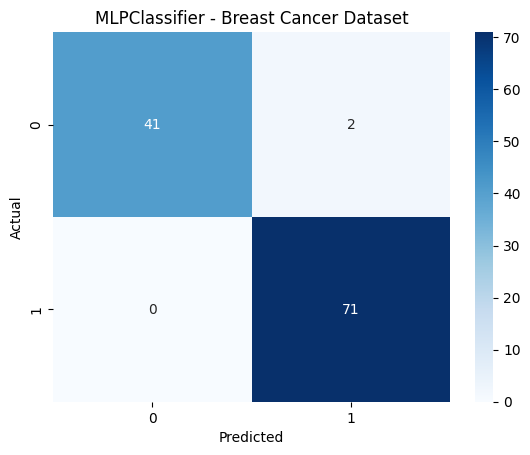

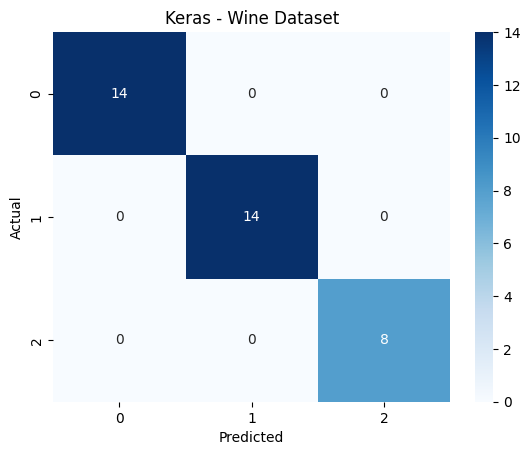

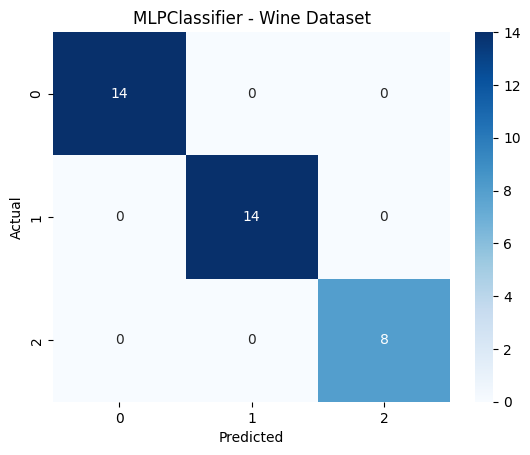

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot confusion matrices for both datasets
plot_confusion_matrix(y_test_cancer, y_pred_keras_cancer, "Keras - Breast Cancer Dataset")
plot_confusion_matrix(y_test_cancer, y_pred_mlp_cancer, "MLPClassifier - Breast Cancer Dataset")
plot_confusion_matrix(y_test_wine, y_pred_keras_wine, "Keras - Wine Dataset")
plot_confusion_matrix(y_test_wine, y_pred_mlp_wine, "MLPClassifier - Wine Dataset")


mas comun es gradiente desendiente


# Procesamiento de imágenes - librerias python

##  Crear una imagen de 500x400, mitad azul y mitad magenta, con una cruz amarilla en el centro y un contorno verde.

In [ ]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
# Dimensiones y colores de la imagen
width, height = 500, 400
image = np.ones((height, width, 3), dtype=np.uint8) * 255  # Fondo blanco



array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]], dtype=uint8)
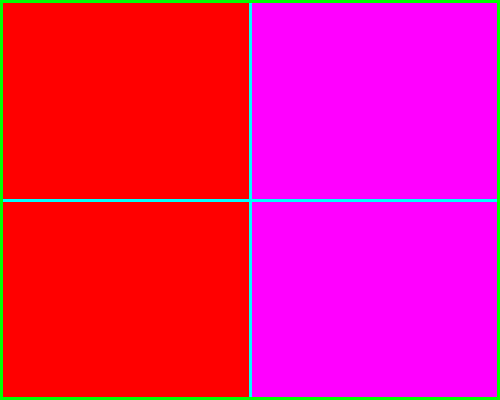

In [ ]:
# Dividir la imagen en azul y magenta
image[:, :width // 2] = (255, 0, 0)       # Azul en la mitad izquierda
image[:, width // 2:] = (255, 0, 255)     # Magenta en la mitad derecha

# Dibujar una cruz amarilla en el centro
cv2.line(image, (width // 2, 0), (width // 2, height), (0, 255, 255), 2)  # Línea vertical
cv2.line(image, (0, height // 2), (width, height // 2), (0, 255, 255), 2)  # Línea horizontal

# Agregar un contorno verde alrededor de la imagen
cv2.rectangle(image, (0, 0), (width - 1, height - 1), (0, 255, 0), 3)


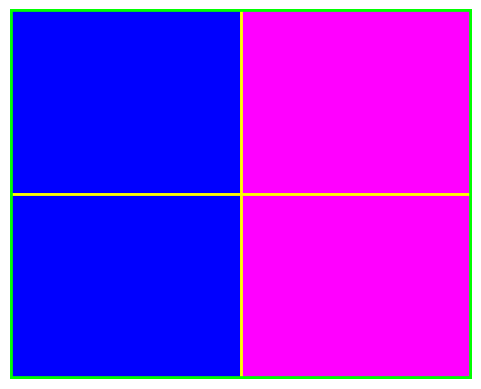

In [ ]:
# Mostrar la imagen con Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Ocultar ejes
plt.show()

### Variacion intercalada

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Dimensiones y colores de la imagen
width, height = 500, 400
image = np.ones((height, width, 3), dtype=np.uint8) * 255  # Fondo blanco

# Dividir la imagen en cuatro mitades
image[0:height // 2, 0:width // 2] = (255, 0, 255)  # Magenta en la esquina superior izquierda
image[0:height // 2, width // 2:] = (255, 0, 0)      # Azul en la esquina superior derecha
image[height // 2:, 0:width // 2] = (255, 0, 0)      # Azul en la esquina inferior izquierda
image[height // 2:, width // 2:] = (255, 0, 255)      # Magenta en la esquina inferior derecha


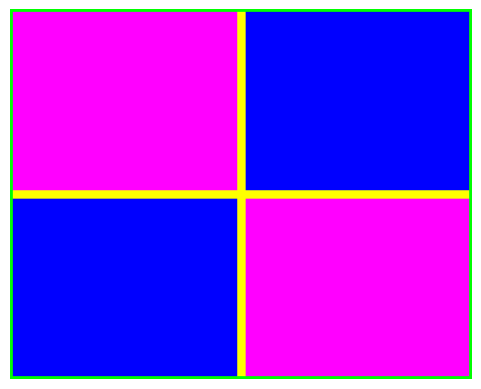

In [ ]:

# Dibujar una cruz amarilla más gruesa en el centro
cv2.line(image, (width // 2, 0), (width // 2, height), (0, 255, 255), 8)  # Línea vertical gruesa
cv2.line(image, (0, height // 2), (width, height // 2), (0, 255, 255), 8)  # Línea horizontal gruesa

# Agregar un contorno verde alrededor de la imagen
cv2.rectangle(image, (0, 0), (width - 1, height - 1), (0, 255, 0), 3)

# Mostrar la imagen con Matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Ocultar ejes
plt.show()


### variacion con funciones y for

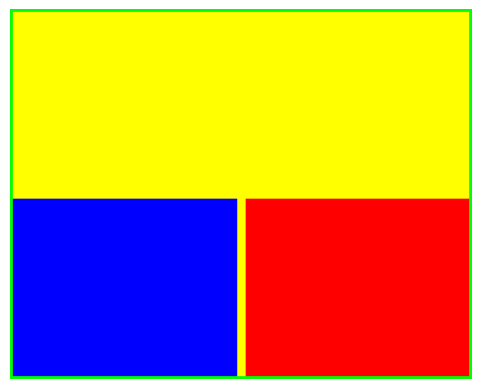

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#create by gemini and edited by me

# Diccionario de colores
color_dict = {
    "magenta": (255, 0, 255),
    "blue": (255, 0, 0),
    "green": (0, 255, 0),
    "red": (0, 0, 255),
    "yellow": (0, 255, 255),
    "white": (255, 255, 255),
    "black": (0, 0, 0)
}

def create_colored_grid(width, height, color_positions):
    """
    Create an image divided into sections with specified colors at given positions.

    Parameters:
    - width: Width of the image.
    - height: Height of the image.
    - color_positions: List of tuples where each tuple contains:
      - (row_start, row_end, col_start, col_end, color_name)

    Returns:
    - None: Displays the generated image.
    """

    # Create a blank white image
    image = np.ones((height, width, 3), dtype=np.uint8) * 255

    # Fill the sections with the specified colors
    for (row_start, row_end, col_start, col_end, color_name) in color_positions:
        color = color_dict.get(color_name)  # Get RGB color from the dictionary
        if color is not None:
            image[row_start:row_end, col_start:col_end] = color

    # Draw a yellow cross in the center
    cv2.line(image, (width // 2, 0), (width // 2, height), (0, 255, 255), 8)  # Vertical line
    cv2.line(image, (0, height // 2), (width, height // 2), (0, 255, 255), 8)  # Horizontal line

    # Add a green border around the image
    cv2.rectangle(image, (0, 0), (width - 1, height - 1), (0, 255, 0), 3)

    # Show the image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
color_positions = [
    (0, 200, 0, 250, "yellow"),  # Magenta (top left)
    (0, 200, 250, 500, "yellow"),    # Blue (top right)
    (200, 400, 0, 250, "blue"),     # Blue (bottom left)
    (200, 400, 250, 500, "red") # Magenta (bottom right)
]

create_colored_grid(500, 400, color_positions)


## Cargar una imagen de una persona, detectar la cabeza y colocarla en las cuatro esquinas de la imagen.

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow



In [ ]:

# Define a function to load an image and validate if we have an error
def load_image(image_path):
    """
    Loads an image from a specified path.

    Parameters:
    - image_path: The path of the image file.

    Returns:
    - image: The loaded image in OpenCV format.
    """
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load the image.")
    return image


In [ ]:
# Define a function to extract a region
def extract_region(image, coordinates, width, height):
    """
    Extracts a region from the image based on given coordinates.

    Parameters:
    - image: The original image to extract a region from.
    - top_left: Tuple (x, y) representing the coordinates corner of the region.
    - width: Width of the region to extract.
    - height: Height of the region to extract.

    Returns:
    - region: The extracted region from the image.
    """
    x, y = coordinates
    region = image[y:y + height, x:x + width]
    return region


In [ ]:

# Define a function to place the extracted region
def draw_region_in_corners(image, region):
    """
    Places a specific region in the four corners of the original image.

    Parameters:
    - image: The original image.
    - region: The extracted region to place in the corners.

    Returns:
    - image_with_corners: The modified image with the region placed in all four corners.
    """
    # Make a copy of the original image to preserve the background
    image_with_corners = image.copy()

    # Define the coordinates for the four corners
    corners = [
        (0, 0),                               # Top-left corner
        (0, image.shape[1] - region.shape[1]),  # Top-right corner
        (image.shape[0] - region.shape[0], 0),  # Bottom-left corner
        (image.shape[0] - region.shape[0], image.shape[1] - region.shape[1])  # Bottom-right corner
    ]

    # Place the region in each corner
    for y_offset, x_offset in corners:
        image_with_corners[y_offset:y_offset + region.shape[0], x_offset:x_offset + region.shape[1]] = region

    return image_with_corners


In [ ]:

# Define a main function to load the image, extract the region, and display the modified image
def process_image(image_path, top_left, width, height):
    """
    Loads an image, extracts a specified region by coordinates,
    places it in the four corners, and displays the result.

    Parameters:
    - image_path: Path of the image file.
    - top_left: Coordinate (x, y) for the top-left corner of the region to extract.
    - width: Width of the region to extract.
    - height: Height of the region to extract.
    """
    # Load the image from the specified path
    image = load_image(image_path)
    if image is None:
        return
    cv2_imshow(image)

    # Extract the specified region from the image
    region = extract_region(image, top_left, width, height)

    # Place the extracted region in the corners of the original image
    image_with_corners = draw_region_in_corners(image, region)

    # Display the modified image in Google Colab
    print("image with regions faces")
    cv2_imshow(image_with_corners)


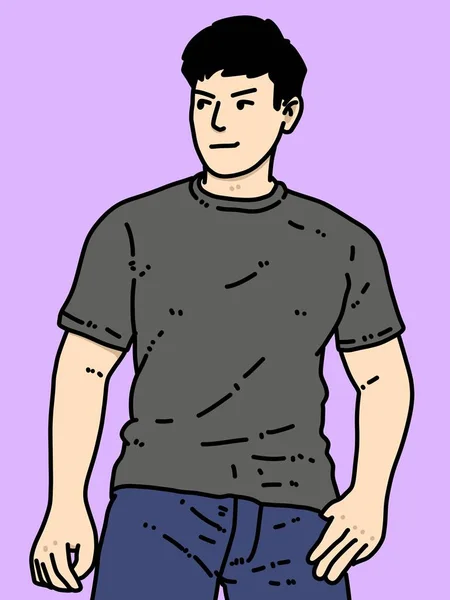

image editor


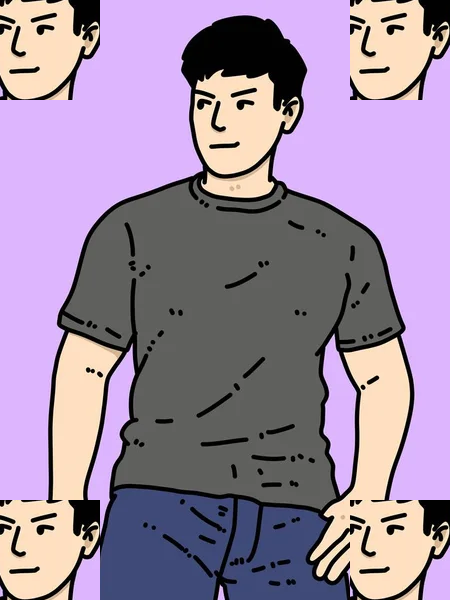

In [ ]:
# Example usage
image_path = '/content/persona.jpg'  # Replace with your image path
coord = (200, 75)   # Top-left corner coordinates of the region to extract
width = 100           # Width of the region to extract
height = 100          # Height of the region to extract
process_image(image_path, coord, width, height)

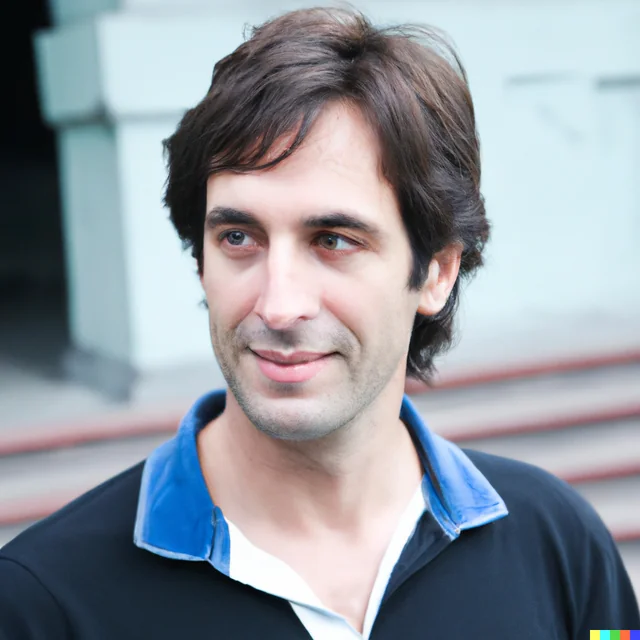

image with regions faces


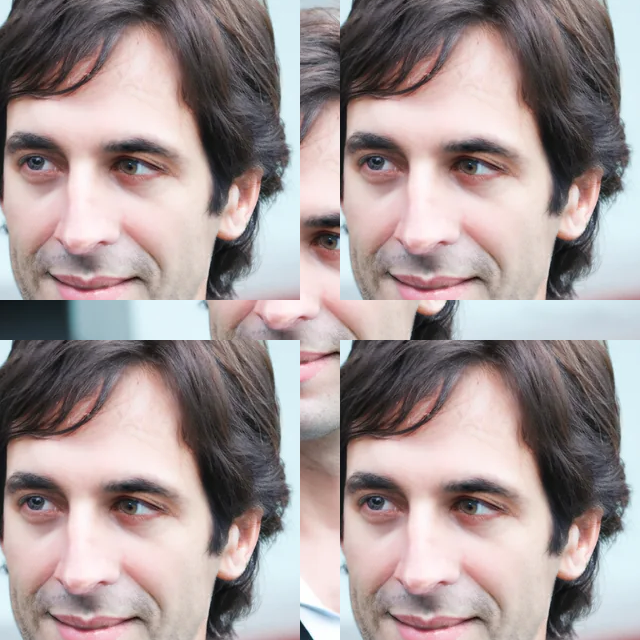

In [ ]:
# Example usage
image_path = '/content/persona2.webp'  # Replace with your image path
coord = (200, 75)   # Top-left corner coordinates of the region to extract
width = 300           # Width of the region to extract
height = 300          # Height of the region to extract
process_image(image_path, coord, width, height)

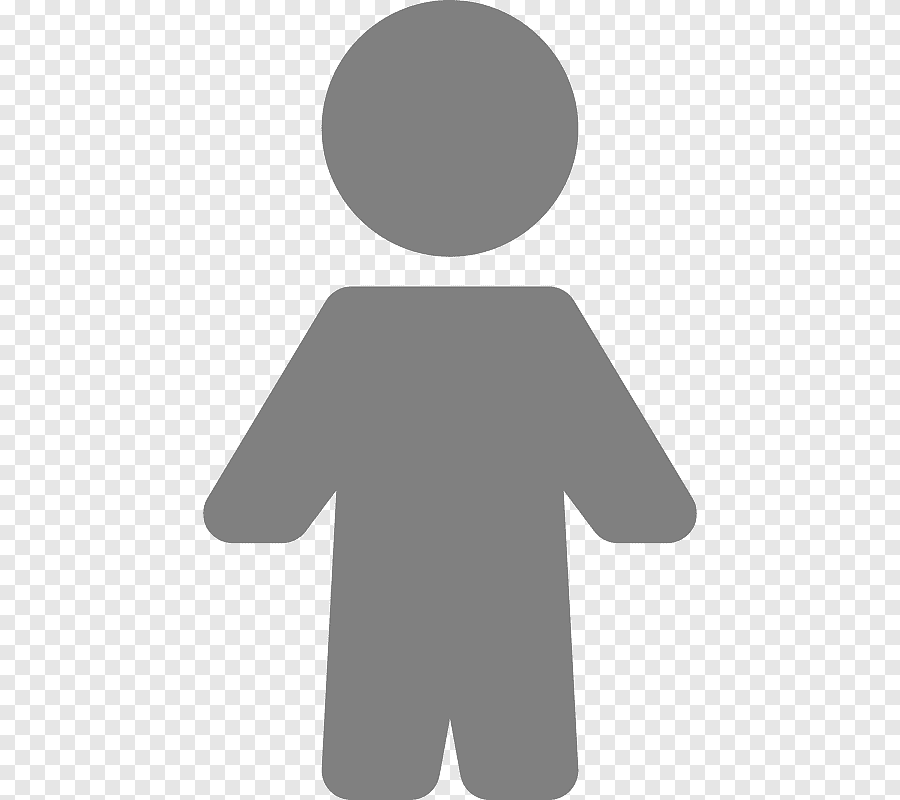

image with regions faces


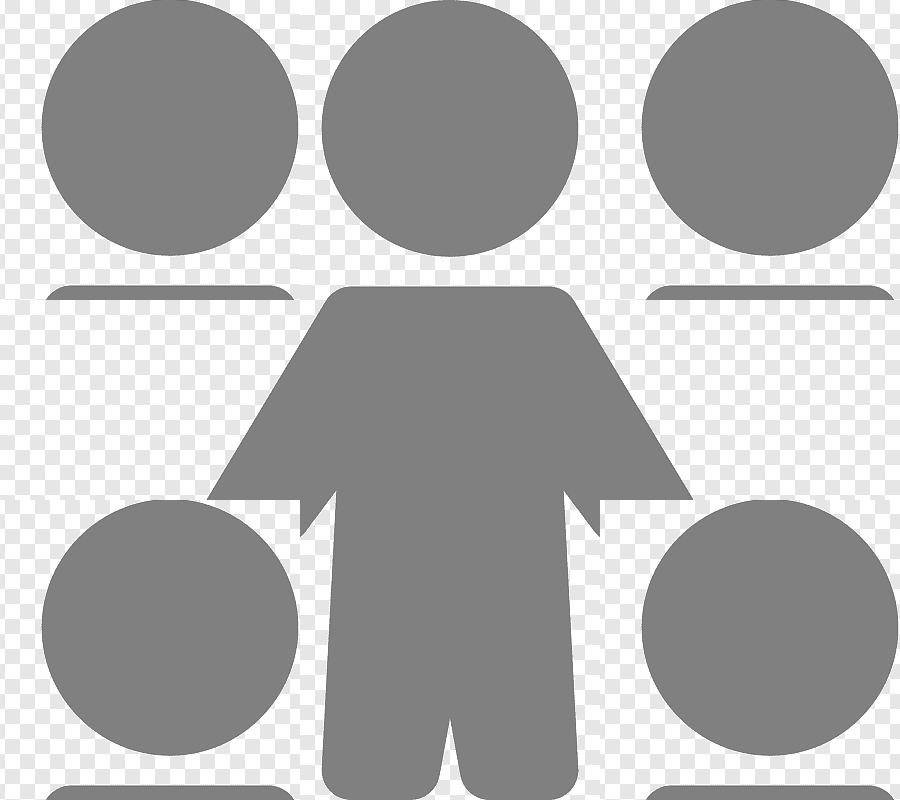

In [ ]:
# Example usage
image_path = '/content/persona5.png'  # Replace with your image path
coord = (280, 1)   # Top-left corner coordinates of the region to extract
width = 300           # Width of the region to extract
height = 300          # Height of the region to extract
process_image(image_path, coord, width, height)

# con identificador de caras

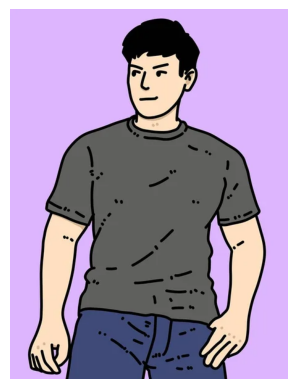

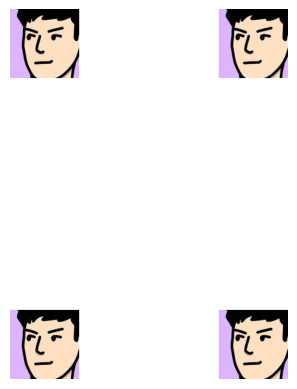

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    """
    Load and display the original image.

    Parameters:
    - image_path: Path to the image file.

    Returns:
    - image: The loaded image.
    """
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
    return image

def load_and_draw_head_in_corners(image):
    """
    Detect the head in the image and place it in the corners.

    Parameters:
    - image: The input image with a person.

    Returns:
    - None: Displays the modified image.
    """
    # Load the pre-trained Haar cascade classifier for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert the image to grayscale for face detection
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

    # Check if a face is detected
    if len(faces) == 0:
        print("No face detected.")
        return

    # Get the first detected face (assumes there's at least one)
    (x, y, w, h) = faces[0]
    head = image[y:y + h, x:x + w]

    # Create a new image to place the head in the corners
    height, width, _ = image.shape
    corners_image = np.ones((height, width, 3), dtype=np.uint8) * 255  # White background

    # Place the detected head in the four corners
    corners = [
        (0, 0),                             # Top-left corner
        (0, width - head.shape[1]),        # Top-right corner
        (height - head.shape[0], 0),       # Bottom-left corner
        (height - head.shape[0], width - head.shape[1])  # Bottom-right corner
    ]

    for corner in corners:
        y_offset, x_offset = corner
        corners_image[y_offset:y_offset + head.shape[0], x_offset:x_offset + head.shape[1]] = head

    # Show the modified image with the head in the corners
    plt.imshow(cv2.cvtColor(corners_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
image_path = '/content/persona.jpg'  # Replace with your image path
original_image = load_image(image_path)

# Show the original image
if original_image is not None:
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.show()

# Process the image to place head in corners
load_and_draw_head_in_corners(original_image)




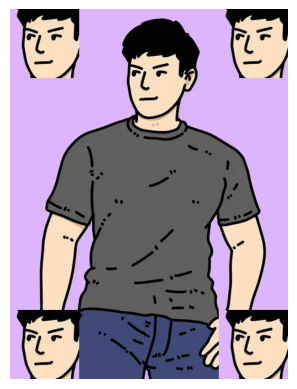

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    """
    Carga la imagen desde la ruta especificada.

    Parameters:
    - image_path: Ruta de la imagen.

    Returns:
    - image: La imagen cargada en formato OpenCV.
    """
    image = cv2.imread(image_path)
    if image is None:
        print("Error: No se pudo cargar la imagen.")
    return image

def detect_head(image):
    """
    Detecta la cabeza (rostro) en la imagen usando un clasificador Haar Cascade.

    Parameters:
    - image: La imagen en la cual se quiere detectar el rostro.

    Returns:
    - head_region: La región de la cabeza detectada (subimagen), o None si no se detecta.
    """
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        print("No se detectó ninguna cara.")
        return None

    x, y, w, h = faces[0]  # Usamos solo el primer rostro detectado
    head_region = image[y:y + h, x:x + w]
    return head_region

def draw_head_in_corners_with_background(image, head_region):
    """
    Coloca la región de la cabeza en las cuatro esquinas de la misma imagen.

    Parameters:
    - image: La imagen original.
    - head_region: La región de la cabeza a ubicar en las esquinas.

    Returns:
    - image_with_corners: La imagen con la cabeza ubicada en las cuatro esquinas.
    """
    # Crear una copia de la imagen original para preservar el fondo
    image_with_corners = image.copy()

    # Coordenadas de las cuatro esquinas
    corners = [
        (0, 0),                             # Esquina superior izquierda
        (0, image.shape[1] - head_region.shape[1]),  # Esquina superior derecha
        (image.shape[0] - head_region.shape[0], 0),  # Esquina inferior izquierda
        (image.shape[0] - head_region.shape[0], image.shape[1] - head_region.shape[1])  # Esquina inferior derecha
    ]

    # Colocar la región de la cabeza en cada esquina
    for y_offset, x_offset in corners:
        image_with_corners[y_offset:y_offset + head_region.shape[0], x_offset:x_offset + head_region.shape[1]] = head_region

    return image_with_corners

def process_image(image_path):
    """
    Carga una imagen, detecta la cabeza, la coloca en las cuatro esquinas y muestra el resultado.

    Parameters:
    - image_path: Ruta de la imagen.
    """
    # Cargar la imagen
    image = load_image(image_path)
    if image is None:
        return

    # Detectar la cabeza en la imagen
    head_region = detect_head(image)
    if head_region is None:
        return

    # Colocar la cabeza en las esquinas de la imagen original
    image_with_corners = draw_head_in_corners_with_background(image, head_region)

    # Mostrar la imagen resultante
    plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Ejemplo de uso
image_path = '/content/persona.jpg'  # Reemplaza con la ruta de tu imagen
process_image(image_path)


In [ ]:
image_path = '/content/persona2.jpg'  # Replace with your image path
original_image = load_image(image_path)

# Show the original image
if original_image is not None:
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.show()

# Process the image to place head in corners
load_and_draw_head_in_corners(original_image)

Error: Image not found.


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


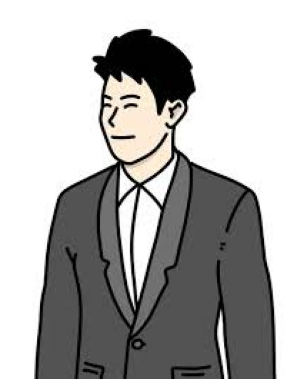

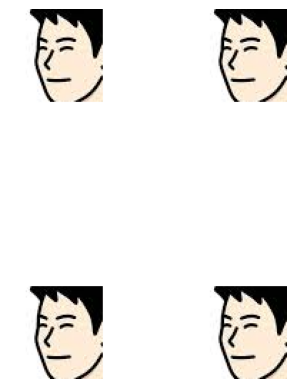

In [ ]:
image_path = '/content/persona3.jpg'  # Replace with your image path
original_image = load_image(image_path)

# Show the original image
if original_image is not None:
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.show()

# Process the image to place head in corners
load_and_draw_head_in_corners(original_image)

In [ ]:
image_path = '/content/persona4.webp'  # Replace with your image path
original_image = load_image(image_path)

# Show the original image
if original_image is not None:
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.show()

# Process the image to place head in corners
load_and_draw_head_in_corners(original_image)

Error: Image not found.


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


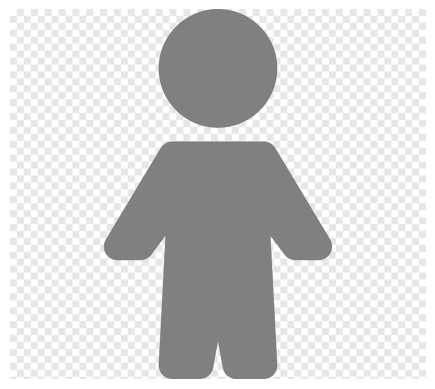

No face detected.


In [ ]:
image_path = '/content/persona5.png'  # Replace with your image path
original_image = load_image(image_path)

# Show the original image
if original_image is not None:
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Hide axes
    plt.show()

# Process the image to place head in corners
load_and_draw_head_in_corners(original_image)

# filtros a Imagenes


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow



In [ ]:
#define function
def apply_convolution(image_path):
    """
    Load an image and apply different convolution filters to demonstrate various effects.

    Parameters:
    - image_path: Path to the image file.

    Displays:
    - Original image and the images after applying each filter.
    """
    # Load the original image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found.")
        return

    # Display the original image
    print("Original Image:")
    cv2_imshow(image)

    # Define different kernels for convolution
    blur_kernel = np.ones((5, 5), np.float32) / 25  # Smoothing filter
    edge_kernel = np.array([[-1, -1, -1],
                            [-1,  8, -1],
                            [-1, -1, -1]])           # Edge detection filter
    sharpen_kernel = np.array([[0, -1,  0],
                               [-1,  5, -1],
                               [0, -1,  0]])        # Sharpening filter

    # Apply smoothing (blur) filter
    blurred_image = cv2.filter2D(image, -1, blur_kernel)
    print("Blurred Image (Smoothing Filter):")
    cv2_imshow(blurred_image)

    # Apply edge detection filter
    edge_detected_image = cv2.filter2D(image, -1, edge_kernel)
    print("Edge Detected Image (Edge Detection Filter):")
    cv2_imshow(edge_detected_image)

    # Apply sharpening filter
    sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)
    print("Sharpened Image (Sharpening Filter):")
    cv2_imshow(sharpened_image)


In [ ]:
# Example usage
image_path = '/content/cara1.jpg'  # Replace with your image path
apply_convolution(image_path)


Error: Image not found.


# tarea ejecucion


• Crear red el dataset MNIST
• Guardar el modelocon .save
Hacer Prdicciones con imagenes
• Realizar metricas de evaluación

dataset de imagenes

kaggle
o tenso flow


In [ ]:
#Import libreries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 51s 58ms/step - accuracy: 0.8685 - loss: 0.4398 - val_accuracy: 0.9838 - val_loss: 0.0601
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 93s 71ms/step - accuracy: 0.9814 - loss: 0.0616 - val_accuracy: 0.9860 - val_loss: 0.0452
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 75s 64ms/step - accuracy: 0.9874 - loss: 0.0402 - val_accuracy: 0.9878 - val_loss: 0.0407
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 56ms/step - accuracy: 0.9915 - loss: 0.0271 - val_accuracy: 0.9855 - val_loss: 0.0433
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9923 - loss: 0.0243 - val_accuracy: 0.9878 - val_loss: 0.0449
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


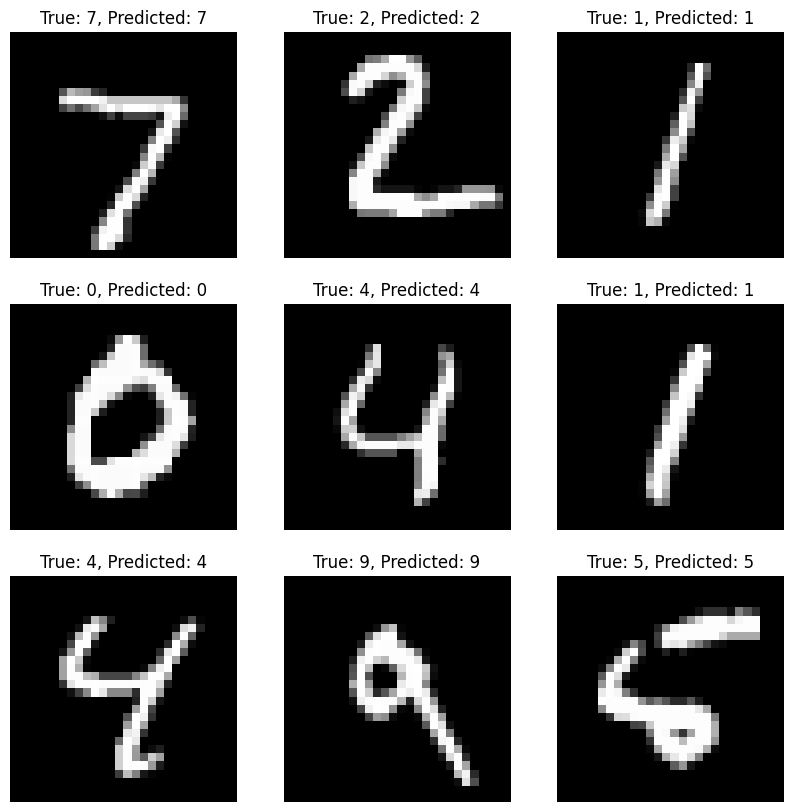

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      1.00      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



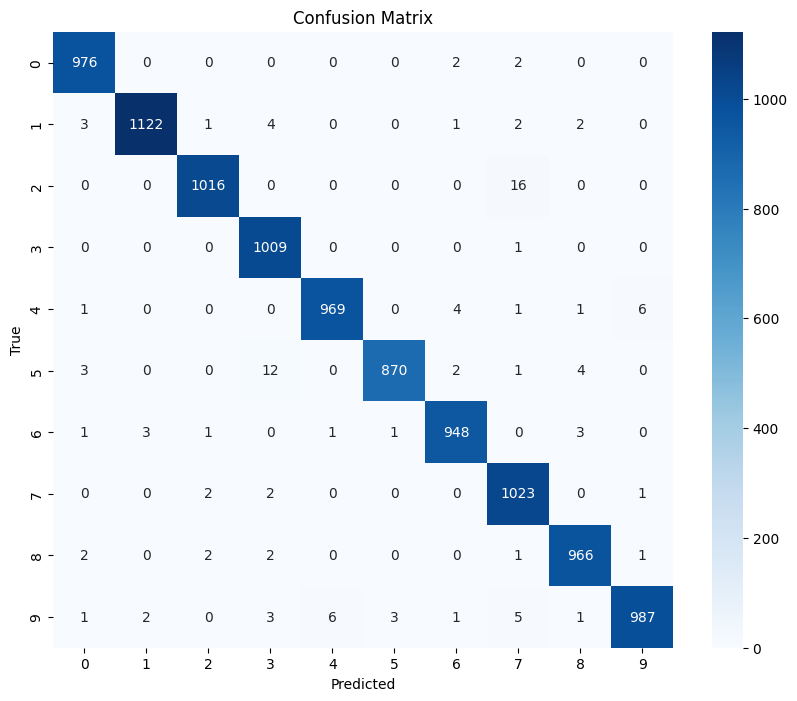

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to include channel dimension
x_train = np.expand_dims(x_train, axis=-1)  # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Make predictions on the test set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Display some images with their predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[i]}, Predicted: {predicted_classes[i]}')
    plt.axis('off')
plt.show()

# Evaluate the model using metrics
print("Classification Report:")
print(classification_report(y_test, predicted_classes))

# Create and display the confusion matrix
confusion_mtx = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save the trained model
model.save('mnist_model.h5')


# Prediccion piedra papel o tijeras


In [3]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset
dataset, info = tfds.load('rock_paper_scissors', with_info=True, as_supervised=True)
train_ds, test_ds = dataset['train'], dataset['test']

# Preprocess the data
def preprocess(image, label):
    image = tf.image.resize(image, [150, 150])
    image = image / 255.0
    return image, label

train_ds = train_ds.map(preprocess).batch(32).shuffle(1000)
test_ds = test_ds.map(preprocess).batch(32)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.36N1MI_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.36N1MI_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [5]:

# Build and train the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes: rock, paper, scissors
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=test_ds, epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


79/79 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.6440 - loss: 1.0348 - val_accuracy: 0.8226 - val_loss: 0.4383
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.9981 - loss: 0.0152 - val_accuracy: 0.7796 - val_loss: 0.5464
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9976 - loss: 0.0100 - val_accuracy: 0.7849 - val_loss: 0.6362
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 1.0000 - loss: 1.9458e-04 - val_accuracy: 0.7796 - val_loss: 0.7022
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 1.0000 - loss: 1.2561e-04 - val_accuracy: 0.7796 - val_loss: 0.7335
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 1.0000 - loss: 5.9146e-05 - val_accuracy: 0.7849 - val_loss: 0.7616
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 1.0000 - loss: 5.2376e-05 - val_accuracy: 0.7849 - val_loss: 0.7810
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 1.0000 - loss: 3.4850e-05 - val_accuracy: 0

In [7]:
# Function to get true labels and predictions from the test dataset
def get_labels_predictions(test_dataset):
    true_labels = []
    predicted_labels = []

    for images, labels in test_dataset:
        predictions = model.predict(images)
        predicted_labels.extend(np.argmax(predictions, axis=1))
        true_labels.extend(labels.numpy())

    return true_labels, predicted_labels

In [8]:

# Save the model
model.save('rock_paper_scissors_model.h5')

# Evaluate metrics on the test set
true_labels, predicted_labels = get_labels_predictions(test_ds)

# Classification report
report = classification_report(true_labels, predicted_labels, target_names=['rock', 'paper', 'scissors'])
print("Classification Report:\n", report)

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 898ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 689ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Classification Report:
               precision    recall  f1-score   support

        rock       1.00      0.85      0.92       124
       paper       0.70      0.85      0.77       124
    scissors       0.70      0.65      0.67       124

    accuracy                           0.78       372
   macro avg       0.80      0.78      0.79       372
weighted avg       0.80      0.78      0.79       372



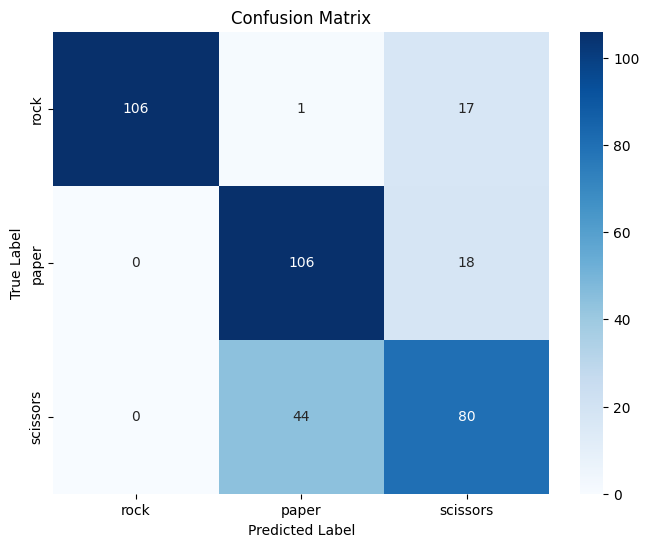

In [19]:

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['rock', 'paper', 'scissors'],
            yticklabels=['rock', 'paper', 'scissors'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Function to predict the class of multiple images and display them
def predict_images(image_paths):
    class_names = ['rock', 'paper', 'scissors']
    predictions = []

    plt.figure(figsize=(10, 5))

    for idx, image_path in enumerate(image_paths):
        img = image.load_img(image_path, target_size=(150, 150))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)  # Create a batch

        pred = model.predict(img_array)
        predicted_class = class_names[np.argmax(pred)]
        predictions.append(predicted_class)

        # Display the image
        plt.subplot(1, len(image_paths), idx + 1)
        plt.imshow(img)
        plt.title(f'Predicted: {predicted_class}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    return predictions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


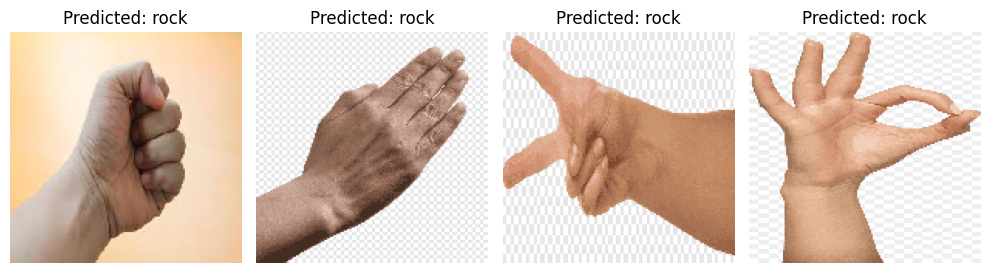

The predicted class for /content/1.jpg is: rock
The predicted class for /content/2.png is: rock
The predicted class for /content/3.png is: rock
The predicted class for /content/4.png is: rock


In [20]:
# Example usage with your images
image_paths = ['/content/1.jpg', '/content/2.png', '/content/3.png', '/content/4.png']  # Update with your image filenames
results = predict_images(image_paths)

# Print predictions
for img, result in zip(image_paths, results):
    print(f'The predicted class for {img} is: {result}')